<a href="https://colab.research.google.com/github/saksham1211/Marketingai_Internship/blob/master/Copy_of_FINAL_NOTEBOOK_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **FINAL NOTEBOOK 2**

This notebook is a collection of three different components which are aimed to predict the category of a 401(K) investment company, based on the form given as the input.

**Input:-** Form of the investment company (*PDF FORMAT*)

**Output:-** *Category* ['Charles Schwab', 'Merrill Lynch', 'American Trade'..........]

### **<------------------Upload PDF------------------>**

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
pip install pdf2jpg

     |████████████████████████████████| 4.3MB 123kB/s 
     |████████████████████████████████| 92kB 10.1MB/s 
  Created wheel for pdf2jpg: filename=pdf2jpg-1.0-cp36-none-any.whl size=4287419 sha256=8908a04c26b8b22b8d601420779259ece215b13eef240786e172141c419a07f3
  Stored in directory: /root/.cache/pip/wheels/bd/dc/72/17e98df36aef90f761a81a74f84414ef16db83fdaa69739909
  Created wheel for img2pdf: filename=img2pdf-0.3.6-cp36-none-any.whl size=39048 sha256=ba271c474d4c9a875be4884a95e1ae72086a2a883e53e849fb87abb83725f148
  Stored in directory: /root/.cache/pip/wheels/8c/1c/68/d8764ed7988b469446ed181a656166170ec45b6b1f974f0236
Successfully built pdf2jpg img2pdf


In [0]:
from io import StringIO
from google.colab import files
uploaded = files.upload()

Saving Bobby_J_Cole_.pdf to Bobby_J_Cole_.pdf


In [0]:
PDF_PATH = '/content/drive/My Drive/DOC-NER/Schwab_IRA/Bobby_J_Cole_.pdf'

In [0]:
from pdf2jpg import pdf2jpg
inputpath = PDF_PATH
outputpath = "/content"
# To convert single page
result = pdf2jpg.convert_pdf2jpg(inputpath, outputpath, pages="0")


**IMAGE PATH**

In [0]:
IMAGE_PATH = '/content/2.jpg'

Populating the interactive namespace from numpy and matplotlib


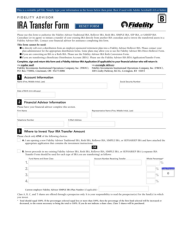


SUCCESSFULLY CONVERTED PDF INTO JPG !


In [0]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread(IMAGE_PATH)
imgplot = plt.imshow(img)
axis('off')
plt.show()

print()
print("SUCCESSFULLY CONVERTED PDF INTO JPG !")

## **LOGO AND TYPE DETECTION (*OBJECT DETECTION*)**
In this part of the Notebook, the converted JPEG file is given as the input and using the principles of object detection and using the YOLOV3 Framework, we predict the *name of the company* and the *type of form*.

**Input:-** JPEG FILE

**Output:-** *Category* ['Merrill Lynch', 'Charles Schwab'.......]  *Type* ['IRA, Client Account Transfer Form'......] 

In [0]:
!pip3 install tensorflow-gpu==1.13.1

     |████████████████████████████████| 345.2MB 44kB/s 
     |████████████████████████████████| 368kB 33.3MB/s 
     |████████████████████████████████| 3.2MB 33.8MB/s 
ERROR: tensorflow 2.2.0 has requirement tensorboard<2.3.0,>=2.2.0, but you'll have tensorboard 1.13.1 which is incompatible.
ERROR: tensorflow 2.2.0 has requirement tensorflow-estimator<2.3.0,>=2.2.0, but you'll have tensorflow-estimator 1.13.0 which is incompatible.
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Found existing installation: tensorboard 2.2.1
    Uninstalling tensorboard-2.2.1:
      Successfully uninstalled tensorboard-2.2.1


In [0]:
!pip3 install imageai --upgrade

     |████████████████████████████████| 184kB 2.8MB/s 


In [0]:
from imageai.Detection.Custom import CustomObjectDetection

detector = CustomObjectDetection()

detector.setModelTypeAsYOLOv3()

prediction_dictionary= {}
prediction_name=[]
prediction_probab=[]
tick_box_field = []

detector.setModelPath("/content/drive/My Drive/PASCAL_DATASET/models/detection_model-ex-027--loss-0007.398.h5") 
detector.setJsonPath("/content/drive/My Drive/PASCAL_DATASET/json/detection_config.json")
detector.loadModel()
detections = detector.detectObjectsFromImage(input_image=IMAGE_PATH, output_image_path="logo_detected_image.jpg")
for detection in detections:
    # print(detection["name"], " : ", detection["percentage_probability"], " : ", detection["box_points"])
    prediction_name.append(detection["name"])
    prediction_probab.append(detection["percentage_probability"])
prediction_dictionary = dict(zip(prediction_probab, prediction_name))
index1 = sorted(prediction_dictionary.keys())[-1]
index2 = sorted(prediction_dictionary.keys())[-2]

if(prediction_dictionary[index1] == "Merrill Lynch" or prediction_dictionary[index2] == "Merrill Lynch"):
  tick_detector = CustomObjectDetection()

  tick_detector.setModelTypeAsYOLOv3()

  tick_detector.setModelPath("/content/drive/My Drive/tick_folder/models/detection_model-ex-034--loss-0009.293.h5") 
  tick_detector.setJsonPath("/content/drive/My Drive/tick_folder/json/detection_config.json")
  tick_detector.loadModel()
  tick_detections = tick_detector.detectObjectsFromImage(input_image=IMAGE_PATH, output_image_path="logo_detected_image.jpg")
  for detection in tick_detections:
    # print(detection["name"], " : ", detection["percentage_probability"], " : ", detection["box_points"])
    tick_box_field.append(detection["name"])
else:
  tick_box_field.append("No checkbox field is present in the form")

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarn

Instructions for updating:
Colocations handled automatically by placer.


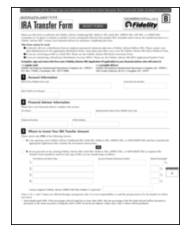


The company name is  Fidelity
Type of form is  IRA Transfer Form
CheckBox Field:-  No checkbox field is present in the form


In [0]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
company_name = []
type_of_form = []
checkbox_field = []
img = cv2.imread('/content/logo_detected_image.jpg',0)
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])
plt.show()
print()
if prediction_dictionary[index1] in ['Charles Schwab', 'Merrill Lynch', 'Fidelity', 'American Funds']:
  print("The company name is ", prediction_dictionary[index1])
  company_name.append(prediction_dictionary[index1])
  print("Type of Form is ", prediction_dictionary[index2])
  type_of_form.append(prediction_dictionary[index2])
  print("CheckBox Field:- ", tick_box_field[0])
  checkbox_field.append(tick_box_field[0])
else:
  print("The company name is ", prediction_dictionary[index2])
  company_name.append(prediction_dictionary[index2])
  print("Type of form is ", prediction_dictionary[index1])
  type_of_form.append(prediction_dictionary[index1])
  print("CheckBox Field:- ", tick_box_field[0])
  checkbox_field.append(tick_box_field[0])

In [0]:
import pandas as pd
import csv
dataframe_dictionary={}
labels = ['Company Name[OD]', 'Type of Form[OD]', 'CheckBox Field[OD]']
data_fields = []
data_fields.append(company_name)
data_fields.append(type_of_form)
data_fields.append(checkbox_field)
dataframe_dictionary = dict(zip(labels, data_fields))
df = pd.DataFrame(dataframe_dictionary)
df

,Company Name[OD],Type of Form[OD],CheckBox Field[OD]
0,Fidelity,IRA Transfer Form,No checkbox field is present in the form


In [0]:
df.to_csv('results.csv', mode ='a', index = False, header=False)

In [0]:
df1 = pd.read_csv('results.csv')
df1

,Company Name[OD],Type of Form[OD],CheckBox Field[OD]
0,Merrill Lynch,Client Account Transfer Form,IRA
1,Charles Schwab,IRA Account Application,No checkbox field is present in the form
2,Fidelity,IRA Transfer Form,No checkbox field is present in the form


## **Named Entity Recognition [NER]**
Using the concepts of NER and OCR, we detect the text element fields in the form and then predict the category, type, and various other fields which are filled in the form.

**Input:-** *FORM* [PDF/JPEG/PNG]

**Output:-** *Category* ['Merrill Lynch', 'Charles Schwab'.......] *Type* ['IRA, Client Account Transfer Form'].......*Name*['Jacobs'....], *City*['New York'....]

In [0]:
!pip install -U spacy

Requirement already up-to-date: spacy in /usr/local/lib/python3.6/dist-packages (2.2.4)


In [0]:
# The google-cloud-vision package already installed in colab, no need to install.
!pip install --upgrade google-cloud-vision

     |████████████████████████████████| 440kB 4.9MB/s 


In [0]:
# Install pdf2image library
!pip install pdf2image

In [0]:
# Install poppler required for pdf2image
!apt-get install poppler-utils 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 31 not upgraded.
Need to get 154 kB of archives.
After this operation, 613 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 poppler-utils amd64 0.62.0-2ubuntu2.10 [154 kB]
Fetched 154 kB in 1s (197 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 144433 files and directories currently installed.)
Preparing to unpack .../poppler-utils_0.62.0-2ubuntu2.10_amd64.deb ...
Unpacking poppler-utils (0.62.0-2ubuntu2.10) ...
Setting up poppler-utils (0.62.0-2ubuntu2.10) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [0]:
import os
from google.cloud import vision
import io
import pandas as pd

 **Extract text from images.**

In [0]:
def detect_text_from_image(path):
    '''
    Function to extract texts from a image using GOOGLE CLOUD VISION API.
    Param:
        path : Full path of image.
    Return:
        Extracted text.
    '''
    # 
    os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "/content/My First Project-dff60b5d1137.json"
    """Detects text in the file."""
    
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()

    image = vision.types.Image(content=content)

    response = client.document_text_detection(image=image)
    texts = response.text_annotations
    print('Texts:')

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

    return texts[0].description

# Detect text from PDF.

In [0]:
detect_text_from_image('/content/drive/My Drive/DOC-NER/Merrilllynch_CRA/Allan A Cook.png')

Texts:


"DTC8862\nACAT0671\nA BANK OF AMERICA COMPANY\nClient Account Transfer Form\nMERRILLS\nUse this form to transfer all or a portion of your account from\nanother financial institution to your Merrill Lynch, Pierce, Fenner &\nSmith Incorporated (“Merrill Lynch”) account.\nFor best results, please complete the information requested below in parts 1 to 4 using ALL CAPITAL letters and\nblack ink. If you need more room for information or signatures, use a copy of the relevant page or a blank sheet. Use\none form for each account that you're transferring.\nThings to know before you begin:\nMany firms transfer assets using an automated transfer process, which typically takes 5 to 6 business days. Other\nfirms either don't use the automated process or must process some assets manually, which takes more time. The\nfollowing estimated time frames for manual transfers are from the date of receipt of instructions by the deli\nfirm and may vary greatly:\n· Equities, bonds and options, approximately 1

**Extract text from PDF**

In [0]:
from pdf2image import convert_from_path
from pathlib import Path

In [0]:
def detect_text_from_pdf(pdf_path, num_of_pages):

    # Extract customer_name from file name. Replace ' ' by '_'
    customer_name = Path(pdf_path).stem.replace(' ', '_')

    pages = convert_from_path(pdf_path, 100, fmt = 'jpg')

    pdf_text = []
    for i, page in enumerate(pages[0:num_of_pages]):
        temp_img_path = customer_name+ str(i) + '.jpg'
        page.save(temp_img_path)
        temp_text = detect_text_from_image(temp_img_path)
        pdf_text.append(temp_text)
        os.remove(temp_img_path)
    return '. '.join(pdf_text).replace("\n", " ")

**Generate list of files**

In [0]:
from pathlib import PurePath

In [0]:
root_paths = ['/content/drive/My Drive/DOC-NER/Ameritrade Institutional',
              '/content/drive/My Drive/DOC-NER/Merrilllynch_CRA',
              '/content/drive/My Drive/DOC-NER/Schwab_IRA']

all_files_list = []
for root_path in root_paths:
    for path, subdirs, files in os.walk(root_path):
        for name in files:
            all_files_list.append(os.path.join(path, name))

In [0]:
all_files_list

['/content/drive/My Drive/DOC-NER/Ameritrade Institutional/Zita J Rottman_.pdf',
 '/content/drive/My Drive/DOC-NER/Ameritrade Institutional/Teresa R Woods_.pdf',
 '/content/drive/My Drive/DOC-NER/Ameritrade Institutional/Susan T Green_.pdf',
 '/content/drive/My Drive/DOC-NER/Ameritrade Institutional/Robert R Sheppard_.pdf',
 '/content/drive/My Drive/DOC-NER/Ameritrade Institutional/Robert R Allan_.pdf',
 '/content/drive/My Drive/DOC-NER/Ameritrade Institutional/Robert J Barr_.pdf',
 '/content/drive/My Drive/DOC-NER/Ameritrade Institutional/Pamela E Byrd_.pdf',
 '/content/drive/My Drive/DOC-NER/Ameritrade Institutional/Nora R Mills_.pdf',
 '/content/drive/My Drive/DOC-NER/Ameritrade Institutional/Michael_C_Preston_.pdf',
 '/content/drive/My Drive/DOC-NER/Ameritrade Institutional/Mary H Craven_.pdf',
 '/content/drive/My Drive/DOC-NER/Ameritrade Institutional/Mary H Craven_ (1).pdf',
 '/content/drive/My Drive/DOC-NER/Ameritrade Institutional/Marie P Watkins_.pdf',
 '/content/drive/My Driv

In [0]:
from tqdm import tqdm
extracted_text = []
customer_file_name = []

for path_ in tqdm(all_files_list):
    print(path_)
    file_name = path_.split('/')[-1]
    print(file_name)
    
    if Path(file_name).suffix == '.pdf':
        extracted_text.append(detect_text_from_pdf(pdf_path = path_, num_of_pages = 2))
        customer_file_name.append(file_name)
    elif Path(file_name).suffix == '.png' or 'jpg':
        extracted_text.append(detect_text_from_image(path_))
        customer_file_name.append(file_name)
    else:
        pass


  0%|          | 0/72 [00:00<?, ?it/s]

/content/drive/My Drive/DOC-NER/Ameritrade Institutional/Zita J Rottman_.pdf
Zita J Rottman_.pdf
Texts:



  1%|▏         | 1/72 [00:01<02:10,  1.84s/it]

Texts:
/content/drive/My Drive/DOC-NER/Ameritrade Institutional/Teresa R Woods_.pdf
Teresa R Woods_.pdf
Texts:



  3%|▎         | 2/72 [00:03<02:05,  1.79s/it]

Texts:
/content/drive/My Drive/DOC-NER/Ameritrade Institutional/Susan T Green_.pdf
Susan T Green_.pdf
Texts:



  4%|▍         | 3/72 [00:04<01:56,  1.70s/it]

Texts:
/content/drive/My Drive/DOC-NER/Ameritrade Institutional/Robert R Sheppard_.pdf
Robert R Sheppard_.pdf
Texts:



  6%|▌         | 4/72 [00:06<01:53,  1.67s/it]

Texts:
/content/drive/My Drive/DOC-NER/Ameritrade Institutional/Robert R Allan_.pdf
Robert R Allan_.pdf
Texts:



  7%|▋         | 5/72 [00:08<01:52,  1.67s/it]

Texts:
/content/drive/My Drive/DOC-NER/Ameritrade Institutional/Robert J Barr_.pdf
Robert J Barr_.pdf
Texts:



  8%|▊         | 6/72 [00:09<01:50,  1.67s/it]

Texts:
/content/drive/My Drive/DOC-NER/Ameritrade Institutional/Pamela E Byrd_.pdf
Pamela E Byrd_.pdf
Texts:



 10%|▉         | 7/72 [00:11<01:47,  1.65s/it]

Texts:
/content/drive/My Drive/DOC-NER/Ameritrade Institutional/Nora R Mills_.pdf
Nora R Mills_.pdf
Texts:



 11%|█         | 8/72 [00:13<01:45,  1.65s/it]

Texts:
/content/drive/My Drive/DOC-NER/Ameritrade Institutional/Michael_C_Preston_.pdf
Michael_C_Preston_.pdf
Texts:



 12%|█▎        | 9/72 [00:14<01:42,  1.63s/it]

Texts:
/content/drive/My Drive/DOC-NER/Ameritrade Institutional/Mary H Craven_.pdf
Mary H Craven_.pdf
Texts:



 14%|█▍        | 10/72 [00:16<01:41,  1.63s/it]

Texts:
/content/drive/My Drive/DOC-NER/Ameritrade Institutional/Mary H Craven_ (1).pdf
Mary H Craven_ (1).pdf
Texts:



 15%|█▌        | 11/72 [00:17<01:36,  1.58s/it]

Texts:
/content/drive/My Drive/DOC-NER/Ameritrade Institutional/Marie P Watkins_.pdf
Marie P Watkins_.pdf
Texts:



 17%|█▋        | 12/72 [00:19<01:35,  1.59s/it]

Texts:
/content/drive/My Drive/DOC-NER/Ameritrade Institutional/Marie P Watkins_ (1).pdf
Marie P Watkins_ (1).pdf
Texts:



 18%|█▊        | 13/72 [00:20<01:31,  1.55s/it]

Texts:
/content/drive/My Drive/DOC-NER/Ameritrade Institutional/Linda M Rice_.pdf
Linda M Rice_.pdf
Texts:



 19%|█▉        | 14/72 [00:22<01:28,  1.52s/it]

Texts:
/content/drive/My Drive/DOC-NER/Ameritrade Institutional/Lili J Thomas_.pdf
Lili J Thomas_.pdf
Texts:



 21%|██        | 15/72 [00:24<01:28,  1.55s/it]

Texts:
/content/drive/My Drive/DOC-NER/Ameritrade Institutional/Lili J Thomas_ (1).pdf
Lili J Thomas_ (1).pdf
Texts:



 22%|██▏       | 16/72 [00:25<01:24,  1.52s/it]

Texts:
/content/drive/My Drive/DOC-NER/Ameritrade Institutional/Kristen W Hamilton_.pdf
Kristen W Hamilton_.pdf
Texts:



 24%|██▎       | 17/72 [00:27<01:24,  1.54s/it]

Texts:
/content/drive/My Drive/DOC-NER/Ameritrade Institutional/Joseph T Green_.pdf
Joseph T Green_.pdf
Texts:



 25%|██▌       | 18/72 [00:28<01:23,  1.55s/it]

Texts:
/content/drive/My Drive/DOC-NER/Ameritrade Institutional/Joseph T Green_ (1).pdf
Joseph T Green_ (1).pdf
Texts:



 26%|██▋       | 19/72 [00:30<01:22,  1.55s/it]

Texts:
/content/drive/My Drive/DOC-NER/Ameritrade Institutional/Joshua T Truitt_.pdf
Joshua T Truitt_.pdf
Texts:



 28%|██▊       | 20/72 [00:35<02:12,  2.56s/it]

Texts:
/content/drive/My Drive/DOC-NER/Ameritrade Institutional/Joseph N Weed_.pdf
Joseph N Weed_.pdf
Texts:



 29%|██▉       | 21/72 [00:36<01:53,  2.23s/it]

Texts:
/content/drive/My Drive/DOC-NER/Ameritrade Institutional/James P Osborne.pdf
James P Osborne.pdf
Texts:



 31%|███       | 22/72 [00:38<01:43,  2.06s/it]

Texts:
/content/drive/My Drive/DOC-NER/Ameritrade Institutional/James P Osborne (1).pdf
James P Osborne (1).pdf
Texts:



 32%|███▏      | 23/72 [00:39<01:31,  1.87s/it]

Texts:
/content/drive/My Drive/DOC-NER/Ameritrade Institutional/Horace H Carpenter_.pdf
Horace H Carpenter_.pdf
Texts:



 33%|███▎      | 24/72 [00:41<01:27,  1.82s/it]

Texts:
/content/drive/My Drive/DOC-NER/Ameritrade Institutional/Harold N Samaniego_.pdf
Harold N Samaniego_.pdf
Texts:



 35%|███▍      | 25/72 [00:42<01:20,  1.72s/it]

Texts:
/content/drive/My Drive/DOC-NER/Ameritrade Institutional/Floyd K Brown_.pdf
Floyd K Brown_.pdf
Texts:



 36%|███▌      | 26/72 [00:44<01:16,  1.67s/it]

Texts:
/content/drive/My Drive/DOC-NER/Ameritrade Institutional/Damian C Russell.pdf
Damian C Russell.pdf
Texts:



 38%|███▊      | 27/72 [00:46<01:15,  1.68s/it]

Texts:
/content/drive/My Drive/DOC-NER/Ameritrade Institutional/Damian C Russell (1).pdf
Damian C Russell (1).pdf
Texts:



 39%|███▉      | 28/72 [00:47<01:13,  1.66s/it]

Texts:
/content/drive/My Drive/DOC-NER/Ameritrade Institutional/Christopher V Herring_.pdf
Christopher V Herring_.pdf
Texts:



 40%|████      | 29/72 [00:49<01:14,  1.74s/it]

Texts:
/content/drive/My Drive/DOC-NER/Ameritrade Institutional/Christine S Pyne_ (1).pdf
Christine S Pyne_ (1).pdf
Texts:



 42%|████▏     | 30/72 [00:51<01:12,  1.73s/it]

Texts:
/content/drive/My Drive/DOC-NER/Ameritrade Institutional/Carl M Ecklund_ (1).pdf
Carl M Ecklund_ (1).pdf
Texts:



 43%|████▎     | 31/72 [00:53<01:11,  1.74s/it]

Texts:
/content/drive/My Drive/DOC-NER/Ameritrade Institutional/Carl M Ecklund_ (2).pdf
Carl M Ecklund_ (2).pdf
Texts:



 44%|████▍     | 32/72 [00:54<01:10,  1.75s/it]

Texts:
/content/drive/My Drive/DOC-NER/Ameritrade Institutional/Anne C Pugh_.pdf
Anne C Pugh_.pdf
Texts:



 46%|████▌     | 33/72 [00:57<01:16,  1.95s/it]

Texts:
/content/drive/My Drive/DOC-NER/Ameritrade Institutional/Angelica E Senn_.pdf
Angelica E Senn_.pdf
Texts:



 47%|████▋     | 34/72 [00:59<01:13,  1.92s/it]

Texts:
/content/drive/My Drive/DOC-NER/Ameritrade Institutional/Angelica E Senn_ (1).pdf
Angelica E Senn_ (1).pdf
Texts:



 49%|████▊     | 35/72 [01:01<01:10,  1.92s/it]

Texts:
/content/drive/My Drive/DOC-NER/Ameritrade Institutional/Andrew_H_Jones_.pdf
Andrew_H_Jones_.pdf
Texts:



 50%|█████     | 36/72 [01:03<01:10,  1.95s/it]

Texts:
/content/drive/My Drive/DOC-NER/Ameritrade Institutional/Allan_A_Cook_.pdf
Allan_A_Cook_.pdf
Texts:



 51%|█████▏    | 37/72 [01:04<01:06,  1.89s/it]

Texts:
/content/drive/My Drive/DOC-NER/Ameritrade Institutional/Adrian_T_Clemens_.pdf
Adrian_T_Clemens_.pdf
Texts:



 53%|█████▎    | 38/72 [01:06<01:02,  1.85s/it]

Texts:
/content/drive/My Drive/DOC-NER/Ameritrade Institutional/Adrian_T_Clemens_ (1).pdf
Adrian_T_Clemens_ (1).pdf
Texts:



 54%|█████▍    | 39/72 [01:08<00:58,  1.78s/it]

Texts:
/content/drive/My Drive/DOC-NER/Ameritrade Institutional/Addie N McClellan_.pdf
Addie N McClellan_.pdf
Texts:



 56%|█████▌    | 40/72 [01:09<00:56,  1.77s/it]

Texts:
/content/drive/My Drive/DOC-NER/Ameritrade Institutional/Ada J Bardsley_.pdf
Ada J Bardsley_.pdf
Texts:



 57%|█████▋    | 41/72 [01:11<00:52,  1.68s/it]

Texts:
/content/drive/My Drive/DOC-NER/Merrilllynch_CRA/Samantha.png
Samantha.png



 58%|█████▊    | 42/72 [01:12<00:49,  1.63s/it]

Texts:
/content/drive/My Drive/DOC-NER/Merrilllynch_CRA/Rose R Webb.png
Rose R Webb.png



 60%|█████▉    | 43/72 [01:14<00:43,  1.51s/it]

Texts:
/content/drive/My Drive/DOC-NER/Merrilllynch_CRA/Robert N Sanford.png
Robert N Sanford.png



 61%|██████    | 44/72 [01:15<00:38,  1.38s/it]

Texts:
/content/drive/My Drive/DOC-NER/Merrilllynch_CRA/Robert E Regan.png
Robert E Regan.png



 62%|██████▎   | 45/72 [01:16<00:34,  1.27s/it]

Texts:
/content/drive/My Drive/DOC-NER/Merrilllynch_CRA/Richard K Kral.png
Richard K Kral.png



 64%|██████▍   | 46/72 [01:17<00:31,  1.22s/it]

Texts:
/content/drive/My Drive/DOC-NER/Merrilllynch_CRA/Peter E Trosper.png
Peter E Trosper.png



 65%|██████▌   | 47/72 [01:18<00:30,  1.20s/it]

Texts:
/content/drive/My Drive/DOC-NER/Merrilllynch_CRA/Harold L Brooks.pdf
Harold L Brooks.pdf
Texts:



 67%|██████▋   | 48/72 [01:20<00:32,  1.37s/it]

Texts:
/content/drive/My Drive/DOC-NER/Merrilllynch_CRA/Hae F Taylor.pdf
Hae F Taylor.pdf
Texts:



 68%|██████▊   | 49/72 [01:21<00:33,  1.47s/it]

Texts:
/content/drive/My Drive/DOC-NER/Merrilllynch_CRA/Gina F Johnson.pdf
Gina F Johnson.pdf
Texts:



 69%|██████▉   | 50/72 [01:23<00:33,  1.54s/it]

Texts:
/content/drive/My Drive/DOC-NER/Merrilllynch_CRA/Eula R Tucker.pdf
Eula R Tucker.pdf
Texts:



 71%|███████   | 51/72 [01:25<00:33,  1.61s/it]

Texts:
/content/drive/My Drive/DOC-NER/Merrilllynch_CRA/Edna T Peres.pdf
Edna T Peres.pdf
Texts:



 72%|███████▏  | 52/72 [01:27<00:33,  1.66s/it]

Texts:
/content/drive/My Drive/DOC-NER/Merrilllynch_CRA/Edith D Alexander.pdf
Edith D Alexander.pdf
Texts:



 74%|███████▎  | 53/72 [01:29<00:36,  1.93s/it]

Texts:
/content/drive/My Drive/DOC-NER/Merrilllynch_CRA/Diana J Alarcon.pdf
Diana J Alarcon.pdf
Texts:



 75%|███████▌  | 54/72 [01:31<00:34,  1.91s/it]

Texts:
/content/drive/My Drive/DOC-NER/Merrilllynch_CRA/Connie J Llanos.pdf
Connie J Llanos.pdf
Texts:



 76%|███████▋  | 55/72 [01:33<00:31,  1.86s/it]

Texts:
/content/drive/My Drive/DOC-NER/Merrilllynch_CRA/Cletus S Russo.pdf
Cletus S Russo.pdf
Texts:



 78%|███████▊  | 56/72 [01:35<00:29,  1.87s/it]

Texts:
/content/drive/My Drive/DOC-NER/Merrilllynch_CRA/Cheryl J Taylor.pdf
Cheryl J Taylor.pdf
Texts:



 79%|███████▉  | 57/72 [01:37<00:27,  1.83s/it]

Texts:
/content/drive/My Drive/DOC-NER/Merrilllynch_CRA/Candy T Lee.pdf
Candy T Lee.pdf
Texts:



 81%|████████  | 58/72 [01:38<00:25,  1.79s/it]

Texts:
/content/drive/My Drive/DOC-NER/Merrilllynch_CRA/Allan A Cook.png
Allan A Cook.png



 82%|████████▏ | 59/72 [01:39<00:19,  1.48s/it]

Texts:
/content/drive/My Drive/DOC-NER/Merrilllynch_CRA/Allan A Cook (1).png
Allan A Cook (1).png



 83%|████████▎ | 60/72 [01:40<00:16,  1.34s/it]

Texts:
/content/drive/My Drive/DOC-NER/Merrilllynch_CRA/Adrian Clemens.png
Adrian Clemens.png



 85%|████████▍ | 61/72 [01:41<00:14,  1.28s/it]

Texts:
/content/drive/My Drive/DOC-NER/Schwab_IRA/Bobby_J_Cole_.pdf
Bobby_J_Cole_.pdf
Texts:



 86%|████████▌ | 62/72 [01:43<00:14,  1.48s/it]

Texts:
/content/drive/My Drive/DOC-NER/Schwab_IRA/Thomas_L_Dodds_.pdf
Thomas_L_Dodds_.pdf
Texts:



 88%|████████▊ | 63/72 [01:46<00:15,  1.76s/it]

Texts:
/content/drive/My Drive/DOC-NER/Schwab_IRA/Tammy_M_Pereira_.pdf
Tammy_M_Pereira_.pdf
Texts:



 89%|████████▉ | 64/72 [01:49<00:18,  2.29s/it]

Texts:
/content/drive/My Drive/DOC-NER/Schwab_IRA/Richard_K_Forester_.pdf
Richard_K_Forester_.pdf
Texts:



 90%|█████████ | 65/72 [01:52<00:17,  2.54s/it]

Texts:
/content/drive/My Drive/DOC-NER/Schwab_IRA/James_B_Adams_.pdf
James_B_Adams_.pdf
Texts:



 92%|█████████▏| 66/72 [01:55<00:15,  2.57s/it]

Texts:
/content/drive/My Drive/DOC-NER/Schwab_IRA/Edmund_L_Kroeger_.pdf
Edmund_L_Kroeger_.pdf
Texts:



 93%|█████████▎| 67/72 [01:57<00:12,  2.59s/it]

Texts:
/content/drive/My Drive/DOC-NER/Schwab_IRA/Donna_E_Warren_.pdf
Donna_E_Warren_.pdf
Texts:



 94%|█████████▍| 68/72 [02:00<00:10,  2.70s/it]

Texts:
/content/drive/My Drive/DOC-NER/Schwab_IRA/Daniel_P_Woods_.pdf
Daniel_P_Woods_.pdf
Texts:



 96%|█████████▌| 69/72 [02:03<00:08,  2.68s/it]

Texts:
/content/drive/My Drive/DOC-NER/Schwab_IRA/Jonathan_K_Sanchez_.pdf
Jonathan_K_Sanchez_.pdf
Texts:



 97%|█████████▋| 70/72 [02:06<00:05,  2.86s/it]

Texts:
/content/drive/My Drive/DOC-NER/Schwab_IRA/Karen_A_Sliva_.pdf
Karen_A_Sliva_.pdf
Texts:



 99%|█████████▊| 71/72 [02:13<00:04,  4.15s/it]

Texts:
/content/drive/My Drive/DOC-NER/Schwab_IRA/Patricia_J_Kim_.pdf
Patricia_J_Kim_.pdf
Texts:



100%|██████████| 72/72 [02:17<00:00,  1.91s/it]

Texts:


In [0]:
print(extracted_text[0])

D Ameritrade Institutional Reset Form ACCOUNT TRANSFER FORM TO TRANSFER YOUR EXISTING ACCOUNT TO TD AMERITRADE Account # 896547896 Advisor Code 987456932 Case # 1 PLEASE ATTACH A COPY OF YOUR LATEST STATEMENT. TD AMERITRADE ACCOUNT INFORMATION Account Title/Registration: Zita J Rottman Social Security Number/Tax ID: Clearing Number 404711495 0188 Individual Personal Trust Limited Liability Company Roth IRA Qualified Retirement Plan (Non-Qualified) Employer Plan Type: Joint Estate Partnership/Investment Club SEP IRA Simple IRA UTMA/UGMA Corporate Traditional IRA/Rollover RA Coverdell ESA Beneficiary IRA Other: 2 INFORMATION ON THE ACCOUNT YOU ARE TRANSFERRING FROM Account Title/Registration as shown on your statement Account Number Zita JRottman 870214590 Name of Delivering Firm: NVDA Physical Address of Firm (no PO BOX): Telephone Number (required): 200 Crescent Ct #1200 (541) 754-3010 Individual Personal Trust Limited Liability Company Roth IRA Qualified Retirement Plan (Non-Qualified

In [0]:
master_df = pd.DataFrame({'file_name' : customer_file_name,
                          'extracted_text' : extracted_text})

In [0]:
master_df.head()

,file_name,extracted_text
0,Zita J Rottman_.pdf,D Ameritrade Institutional Reset Form ACCOUNT ...
1,Teresa R Woods_.pdf,D Ameritrade Institutional Reset Form ACCOUNT ...
2,Susan T Green_.pdf,D Ameritrade Institutional Reset Form ACCOUNT ...
3,Robert R Sheppard_.pdf,D Ameritrade Institutional Reset Form ACCOUNT ...
4,Robert R Allan_.pdf,D Ameritrade Institutional Reset Form ACCOUNT ...


In [0]:
master_df['FILE NAME'] = master_df['file_name'].apply(lambda x: Path(x).stem)

In [0]:
master_df.head()

,file_name,extracted_text,FILE NAME
0,Zita J Rottman_.pdf,D Ameritrade Institutional Reset Form ACCOUNT ...,Zita J Rottman_
1,Teresa R Woods_.pdf,D Ameritrade Institutional Reset Form ACCOUNT ...,Teresa R Woods_
2,Susan T Green_.pdf,D Ameritrade Institutional Reset Form ACCOUNT ...,Susan T Green_
3,Robert R Sheppard_.pdf,D Ameritrade Institutional Reset Form ACCOUNT ...,Robert R Sheppard_
4,Robert R Allan_.pdf,D Ameritrade Institutional Reset Form ACCOUNT ...,Robert R Allan_


In [0]:
ira_df = pd.read_csv('/content/drive/My Drive/DOC-NER/IRA.csv')

In [0]:
ira_df.head()

,SLNo.,CATEGORY,FILE NAME,FILE SIZE,TITLE,DESCRIPTION,CLIENT,ADDRESS,SOCIAL SECURITY NO,RELATIONSHIP NO.,ACC NO,ACC TYPE,PHONE,CITY,EMAIL
0,0,Merrilllynch_CRA,Adrian Clemens,298 KB,Client Account Transfer Form,Use this form to transfer all or a portion of ...,Daniel C Paul,2 Seaport Ln,545401875,335-0012,89101454,IRA,5417542545,"Boston, MA,02210",Adrian@gmail.com
1,1,Merrilllynch_CRA,Peter E Trosper,295 KB,Client Account Transfer Form,Use this form to transfer all or a portion of ...,Grace P Lane,450 Park Ave #18,593746465,335-8978,66667894,IRA,5417543022,"New York, NY,10022",pater@gmail.com
2,2,Merrilllynch_CRA,Richard K Kral,298 KB,Client Account Transfer Form,Use this form to transfer all or a portion of ...,Jeanette B Hughes,340 Madison Ave,344466775,335-2125,79703212,IRA,5417543888,"New York, NY,10173",Richard@gmail.com
3,3,Merrilllynch_CRA,Robert E Regan,298 KB,Client Account Transfer Form,Use this form to transfer all or a portion of ...,Grace M Gracia,Search Results 11988 El Camino Real #600,417414892,335-0021,NaN,IRA,5417543010,"San Diego, CA,92130",Robert@gmail.com
4,4,Merrilllynch_CRA,Rose R Webb,298 KB,Client Account Transfer Form,Use this form to transfer all or a portion of ...,Donald S Cordova,11150CA-2 #200,539236318,335-4587,22560564,IRA,5417545879,"Los Angeles, CA,90025",Rose@gmail.com


In [0]:
final_df = pd.merge(master_df, ira_df, on='FILE NAME')

In [0]:
final_df.columns = ['file_name', 'extracted_text', 'FILE_NAME', 'SLNo', 'CATEGORY',
       'FILE_SIZE', 'TITLE', 'DESCRIPTION', 'CLIENT', 'ADDRESS',
       'SOCIAL_SECURITY_NO', 'RELATIONSHIP_NO', 'ACC_NO', 'ACC_TYPE', 'PHONE',
       'CITY', 'EMAIL']

In [0]:
final_df['PHONE'] = final_df['PHONE'].apply(lambda x: '('+str(x)[:3]+')'+' '+str(x)[3:6]+'-'+str(x)[6:10])

In [0]:
for i in final_df.columns:
    final_df[i] = final_df[i].astype('str') 

In [0]:
final_df.to_csv('final_df.csv', encoding='utf-8', index=False)

In [0]:
final_df.dtypes

file_name             object
extracted_text        object
FILE_NAME             object
SLNo                  object
CATEGORY              object
FILE_SIZE             object
TITLE                 object
DESCRIPTION           object
CLIENT                object
ADDRESS               object
SOCIAL_SECURITY_NO    object
RELATIONSHIP_NO       object
ACC_NO                object
ACC_TYPE              object
PHONE                 object
CITY                  object
EMAIL                 object
dtype: object

**NER**

In [0]:
import itertools

In [0]:
final_df = pd.read_csv("final_df.csv")
for i in final_df.columns:
    final_df[i] = final_df[i].astype('str') 

In [0]:
final_df.columns = ['file_name', 'extracted_text', 'FILE_NAME', 'SLNo', 'CATEGORY',
       'FILE_SIZE', 'TITLE', 'DESCRIPTION', 'CLIENT', 'ADDRESS',
       'SOCIAL_SECURITY_NO', 'RELATIONSHIP_NO', 'ACC_NO', 'ACC_TYPE', 'PHONE',
       'CITY', 'EMAIL']

In [0]:
final_df['TITLE'] = final_df['TITLE'].apply(lambda x: x.replace('IRA ', ''))

In [0]:
final_df

,file_name,extracted_text,FILE_NAME,SLNo,CATEGORY,FILE_SIZE,TITLE,DESCRIPTION,CLIENT,ADDRESS,SOCIAL_SECURITY_NO,RELATIONSHIP_NO,ACC_NO,ACC_TYPE,PHONE,CITY,EMAIL
0,Zita J Rottman_.pdf,D Ameritrade Institutional Reset Form ACCOUNT ...,Zita J Rottman_,40,Ameritrade Institutional,142 KB,ACCOUNT TRANSFER FORM,A. Transfer from an ACAT eligible Brokerage Fi...,Zita J Rottman,200 Crescent Ct#1200,404711495,nan,870214590,NVDA,(541) 754-3010,nan,nan
1,Teresa R Woods_.pdf,D Ameritrade Institutional Reset Form ACCOUNT ...,Teresa R Woods_,59,Ameritrade Institutional,142 KB,ACCOUNT TRANSFER FORM,A. Transfer from an ACAT eligible Brokerage Fi...,Teresa R Woods,3403 Richards Avenue,139394344,nan,875032122,BABA,(541) 754-1100,nan,nan
2,Susan T Green_.pdf,D Ameritrade Institutional Reset Form ACCOUNT ...,Susan T Green_,28,Ameritrade Institutional,142 KB,ACCOUNT TRANSFER FORM,A. Transfer from an ACAT eligible Brokerage Fi...,Susan T Green,3116 Wright Court,517144655,nan,856901266,TGT,(541) 754-3044,nan,nan
3,Robert R Sheppard_.pdf,D Ameritrade Institutional Reset Form ACCOUNT ...,Robert R Sheppard_,27,Ameritrade Institutional,142 KB,ACCOUNT TRANSFER FORM,A. Transfer from an ACAT eligible Brokerage Fi...,Robert R Sheppard,3291 Hall Street,545401844,nan,987012777,NVDA,(541) 754-3222,nan,nan
4,Robert J Barr_.pdf,D Ameritrade Institutional Reset Form ACCOUNT ...,Robert J Barr_,26,Ameritrade Institutional,142 KB,ACCOUNT TRANSFER FORM,A. Transfer from an ACAT eligible Brokerage Fi...,Robert J Barr,4567 Willison Street,139394322,nan,875032188,BABA,(541) 754-3022,nan,nan
5,Pamela E Byrd_.pdf,D Ameritrade Institutional Reset Form ACCOUNT ...,Pamela E Byrd_,25,Ameritrade Institutional,142 KB,ACCOUNT TRANSFER FORM,A. Transfer from an ACAT eligible Brokerage Fi...,Pamela E Byrd,514 Stutler Lane,139394344,nan,875032122,GOOG,(541) 754-3033,nan,nan
6,Nora R Mills_.pdf,D Ameritrade Institutional Reset Form ACCOUNT ...,Nora R Mills_,57,Ameritrade Institutional,142 KB,ACCOUNT TRANSFER FORM,A. Transfer from an ACAT eligible Brokerage Fi...,Nora R Mills,4010 Mulberry Street,545401870,nan,987012344,JNJ,(541) 754-3055,nan,nan
7,Michael_C_Preston_.pdf,D Ameritrade Institutional Reset Form ACCOUNT ...,Michael_C_Preston_,48,Ameritrade Institutional,142 KB,ACCOUNT TRANSFER FORM,A. Transfer from an ACAT eligible Brokerage Fi...,Michael C Preston,4645 Hope Street,139394339,nan,875032106,BBY,(541) 754-3044,nan,nan
8,Mary H Craven_.pdf,D Ameritrade Institutional Reset Form ACCOUNT ...,Mary H Craven_,24,Ameritrade Institutional,142 KB,ACCOUNT TRANSFER FORM,A. Transfer from an ACAT eligible Brokerage Fi...,Mary H Craven,2397 Deans Lane,545401875,nan,987012322,JNJ,(541) 754-3055,nan,nan
9,Marie P Watkins_.pdf,D Ameritrade Institutional Reset Form ACCOUNT ...,Marie P Watkins_,38,Ameritrade Institutional,142 KB,ACCOUNT TRANSFER FORM,A. Transfer from an ACAT eligible Brokerage Fi...,Marie P Watkins,222 Berkeley St #15,517144661,nan,856901203,TGT,(541) 754-3012,nan,nan


In [0]:
from sklearn.utils import shuffle

In [0]:
from sklearn.model_selection import train_test_split
import spacy
from spacy.util import decaying
from spacy.matcher import PhraseMatcher
from spacy.lang.en import English
from spacy.util import minibatch, compounding
from spacy.gold import GoldParse 
from spacy.scorer import Scorer
import random

In [0]:
final_df = final_df.sample(frac=1)
final_df.reset_index(drop = True, inplace = True)

train, test = train_test_split(final_df, test_size=0.1)

In [0]:
train.shape, test.shape

((54, 17), (6, 17))

In [0]:
['TITLE', 'DESCRIPTION', 'CLIENT', 'ADDRESS',
       'SOCIAL_SECURITY_NO', 'RELATIONSHIP_NO', 'ACC_NO', 'ACC_TYPE', 'PHONE',
       'CITY', 'EMAIL']

['TITLE',
 'DESCRIPTION',
 'CLIENT',
 'ADDRESS',
 'SOCIAL_SECURITY_NO',
 'RELATIONSHIP_NO',
 'ACC_NO',
 'ACC_TYPE',
 'PHONE',
 'CITY',
 'EMAIL']

In [0]:
nlp = English()
#nlp = spacy.load("en_trf_bertbaseuncased_lg")
#nlp.vocab, attr='lemma', validate=True

In [0]:
#TITLE_matcher = PhraseMatcher(nlp.vocab, attr='LOWER')
TITLE_matcher = PhraseMatcher(nlp.vocab, attr='LOWER')
TITLE_patterns = [nlp(i) for i in final_df['TITLE'].to_list()]
TITLE_matcher.add("TITLE", None,*TITLE_patterns)

In [0]:
DESCRIPTION_matcher = PhraseMatcher(nlp.vocab, attr='LOWER')
DESCRIPTION_patterns = [nlp(i) for i in final_df['DESCRIPTION'].to_list()]
DESCRIPTION_matcher.add("DESCRIPTION", None,*DESCRIPTION_patterns)

In [0]:
CLIENT_matcher = PhraseMatcher(nlp.vocab, attr='LOWER')
CLIENT_patterns = [nlp(i) for i in final_df['CLIENT'].to_list()]
CLIENT_matcher.add("CLIENT", None,*CLIENT_patterns)

In [0]:

ADDRESS_matcher = PhraseMatcher(nlp.vocab, attr='LOWER')
ADDRESS_patterns = [nlp(i) for i in final_df['ADDRESS'].to_list()]
ADDRESS_matcher.add("ADDRESS", None,*ADDRESS_patterns)

In [0]:
SOCIAL_SECURITY_NO_matcher = PhraseMatcher(nlp.vocab, attr='LOWER')
SOCIAL_SECURITY_NO_patterns = [nlp(i) for i in final_df['SOCIAL_SECURITY_NO'].to_list()]
SOCIAL_SECURITY_NO_matcher.add("SOCIAL_SECURITY_NO", None,*SOCIAL_SECURITY_NO_patterns)

In [0]:
RELATIONSHIP_NO_matcher = PhraseMatcher(nlp.vocab, attr='LOWER')
RELATIONSHIP_NO_patterns = [nlp(i) for i in final_df['RELATIONSHIP_NO'].to_list()]
RELATIONSHIP_NO_matcher.add("RELATIONSHIP_NO", None,*RELATIONSHIP_NO_patterns)

In [0]:
ACC_NO_matcher = PhraseMatcher(nlp.vocab, attr='LOWER')
ACC_NO_patterns = [nlp(i) for i in final_df['ACC_NO'].to_list()]
ACC_NO_matcher.add("ACC_NO", None,*ACC_NO_patterns)

In [0]:
ACC_TYPE_matcher = PhraseMatcher(nlp.vocab, attr='LOWER')
ACC_TYPE_patterns = [nlp(i) for i in final_df['ACC_TYPE'].to_list()]
ACC_TYPE_matcher.add("ACC_TYPE", None,*ACC_TYPE_patterns)

In [0]:
PHONE_matcher = PhraseMatcher(nlp.vocab, attr='LOWER')
PHONE_patterns = [nlp(i) for i in final_df['PHONE'].to_list()]
PHONE_matcher.add("PHONE", None,*PHONE_patterns)

In [0]:
CITY_matcher = PhraseMatcher(nlp.vocab, attr='LOWER')
CITY_patterns = [nlp(i) for i in final_df['CITY'].to_list()]
CITY_matcher.add("CITY", None,*CITY_patterns)

In [0]:
EMAIL_matcher = PhraseMatcher(nlp.vocab, attr='LOWER')
EMAIL_patterns = [nlp(i) for i in final_df['EMAIL'].to_list()]
EMAIL_matcher.add("EMAIL", None,*EMAIL_patterns)

In [0]:
TRAIN_TEXTS = train['extracted_text'].tolist()
TEST_TEXTS = test['extracted_text'].tolist()

In [0]:
TRAINING_DATA = []

# Create a Doc object for each text in TEXTS
for doc in tqdm(nlp.pipe(TRAIN_TEXTS)):
    # Match on the doc and create a list of matched spans
    TITLE_spans = [doc[start:end] for match_id, start, end in TITLE_matcher(doc)]
    DESCRIPTION_spans = [doc[start:end] for match_id, start, end in DESCRIPTION_matcher(doc)]
    CLIENT_spans = [doc[start:end] for match_id, start, end in CLIENT_matcher(doc)]
    ADDRESS_spans = [doc[start:end] for match_id, start, end in ADDRESS_matcher(doc)]
    SOCIAL_SECURITY_NO_spans = [doc[start:end] for match_id, start, end in SOCIAL_SECURITY_NO_matcher(doc)]
    RELATIONSHIP_NO_spans = [doc[start:end] for match_id, start, end in RELATIONSHIP_NO_matcher(doc)]
    ACC_NO_spans = [doc[start:end] for match_id, start, end in ACC_NO_matcher(doc)]
    ACC_TYPE_spans = [doc[start:end] for match_id, start, end in ACC_TYPE_matcher(doc)]
    PHONE_spans = [doc[start:end] for match_id, start, end in PHONE_matcher(doc)]
    CITY_spans = [doc[start:end] for match_id, start, end in CITY_matcher(doc)]
    EMAIL_spans = [doc[start:end] for match_id, start, end in EMAIL_matcher(doc)]
    
    # Get (start character, end character, label) tuples of matches
    entities = [(span.start_char, span.end_char, "TITLE") for span in TITLE_spans]
    entities.extend([(span.start_char, span.end_char, "DESCRIPTION") for span in DESCRIPTION_spans])
    entities.extend([(span.start_char, span.end_char, "CLIENT") for span in CLIENT_spans])
    entities.extend([(span.start_char, span.end_char, "ADDRESS") for span in ADDRESS_spans])
    entities.extend([(span.start_char, span.end_char, "SOCIAL_SECURITY_NO") for span in SOCIAL_SECURITY_NO_spans])
    entities.extend([(span.start_char, span.end_char, "RELATIONSHIP_NO") for span in RELATIONSHIP_NO_spans])
    entities.extend([(span.start_char, span.end_char, "ACC_NO") for span in ACC_NO_spans])
    entities.extend([(span.start_char, span.end_char, "ACC_TYPE") for span in ACC_TYPE_spans])
    entities.extend([(span.start_char, span.end_char, "PHONE") for span in PHONE_spans])
    entities.extend([(span.start_char, span.end_char, "CITY") for span in CITY_spans])
    entities.extend([(span.start_char, span.end_char, "EMAIL") for span in EMAIL_spans])

    # Format the matches as a (doc.text, entities) tuple
    training_example = (doc.text, {"entities": entities})
    # Append the example to the training data
    TRAINING_DATA.append(training_example)


0it [00:00, ?it/s]
54it [00:00, 229.73it/s]


In [0]:
# Remove repetated of same type entity
for i,_ in enumerate(TRAINING_DATA):
    TRAINING_DATA[i][1]['entities'] = ([next(b) for a, b in itertools.groupby( 
                         TRAINING_DATA[i][1]['entities'], lambda y: y[2])]) 

In [0]:
TRAINING_DATA[0]

('D Ameritrade Institutional Reset Form ACCOUNT TRANSFER FORM TO TRANSFER YOUR EXISTING ACCOUNT TO TD AMERITRADE Account # 875698742 Advisor Code 965478654 Case # 1 PLEASE ATTACH A COPY OF YOUR LATEST STATEMENT. TD AMERITRADE ACCOUNT INFORMATION Account Title/Registration: Floyd K Brown Social Security Number Tax ID: Clearing Number 404711495 0188 Personal Trust Limited Liability Company Roth IRA Individual (Non-Qualified) Joint UTMA/UGMA Qualified Retirement Plan Employer Plan Type: Simple IRA Estate SEP IRA Partnership/Investment Club Traditional IRA/Rollover IRA Corporate Coverdell ESA Beneficiary IRA Other: 2 INFORMATION ON THE ACCOUNT YOU ARE TRANSFERRING FROM Account Title Registration as shown on your statement: Account Number Floyd K Brown 870214590 Name of Delivering Firm: COST Physical Address of Firm (no PO BOX: Telephone Number (required): 4989 Brighton Circle Road (541) 754-3010 Individual Personal Trust Limited Liability Company Roth IRA Qualified Retirement Plan (Non-Qua

In [0]:
TESTING_DATA = []

# Create a Doc object for each text in TEXTS
for doc in tqdm(nlp.pipe(TEST_TEXTS)):
    # Match on the doc and create a list of matched spans
    TITLE_spans = [doc[start:end] for match_id, start, end in TITLE_matcher(doc)]
    DESCRIPTION_spans = [doc[start:end] for match_id, start, end in DESCRIPTION_matcher(doc)]
    CLIENT_spans = [doc[start:end] for match_id, start, end in CLIENT_matcher(doc)]
    ADDRESS_spans = [doc[start:end] for match_id, start, end in ADDRESS_matcher(doc)]
    SOCIAL_SECURITY_NO_spans = [doc[start:end] for match_id, start, end in SOCIAL_SECURITY_NO_matcher(doc)]
    RELATIONSHIP_NO_spans = [doc[start:end] for match_id, start, end in RELATIONSHIP_NO_matcher(doc)]
    ACC_NO_spans = [doc[start:end] for match_id, start, end in ACC_NO_matcher(doc)]
    ACC_TYPE_spans = [doc[start:end] for match_id, start, end in ACC_TYPE_matcher(doc)]
    PHONE_spans = [doc[start:end] for match_id, start, end in PHONE_matcher(doc)]
    CITY_spans = [doc[start:end] for match_id, start, end in CITY_matcher(doc)]
    EMAIL_spans = [doc[start:end] for match_id, start, end in EMAIL_matcher(doc)]
    
    # Get (start character, end character, label) tuples of matches
    entities = [(span.start_char, span.end_char, "TITLE") for span in TITLE_spans]
    entities.extend([(span.start_char, span.end_char, "DESCRIPTION") for span in DESCRIPTION_spans])
    entities.extend([(span.start_char, span.end_char, "CLIENT") for span in CLIENT_spans])
    entities.extend([(span.start_char, span.end_char, "ADDRESS") for span in ADDRESS_spans])
    entities.extend([(span.start_char, span.end_char, "SOCIAL_SECURITY_NO") for span in SOCIAL_SECURITY_NO_spans])
    entities.extend([(span.start_char, span.end_char, "RELATIONSHIP_NO") for span in RELATIONSHIP_NO_spans])
    entities.extend([(span.start_char, span.end_char, "ACC_NO") for span in ACC_NO_spans])
    entities.extend([(span.start_char, span.end_char, "ACC_TYPE") for span in ACC_TYPE_spans])
    entities.extend([(span.start_char, span.end_char, "PHONE") for span in PHONE_spans])
    entities.extend([(span.start_char, span.end_char, "CITY") for span in CITY_spans])
    entities.extend([(span.start_char, span.end_char, "EMAIL") for span in EMAIL_spans])

    # Format the matches as a (doc.text, entities) tuple
    testing_example = (doc.text, {"entities": entities})
    # Append the example to the testing data
    TESTING_DATA.append(testing_example)


6it [00:00, 372.47it/s]


In [0]:
# Remove repetated of same type entity
for i,_ in enumerate(TESTING_DATA):
    TESTING_DATA[i][1]['entities'] = ([next(b) for a, b in itertools.groupby( 
                         TESTING_DATA[i][1]['entities'], lambda y: y[2])]) 

In [0]:
LABEL = ['TITLE',
 'DESCRIPTION',
 'CLIENT',
 'ADDRESS',
 'SOCIAL_SECURITY_NO',
 'RELATIONSHIP_NO',
 'ACC_NO',
 'ACC_TYPE',
 'PHONE',
 'CITY',
 'EMAIL']

In [0]:
os.getcwd()

'/content'

In [0]:
# sets the model, output directory and training iterations 
model = None
output_dir=os.getcwd()
n_iter=100

# Checks to see if there is a current model or no model. In this case I will be starting with a blank model 

if model is not None:
    nlp1 = spacy.load(model)  # load existing spaCy model
    print("Loaded model '%s'" % model)
else:
    nlp1 = spacy.blank('en')  # create blank Language class
    print("Created blank 'en' model")



# create the built-in pipeline components and add them to the pipeline
    # nlp.create_pipe works for built-ins that are registered with spaCy
if 'ner' not in nlp1.pipe_names:
    ner = nlp1.create_pipe('ner')
    nlp1.add_pipe(ner, last=True)
# otherwise, get it so we can add labels
else:
    ner = nlp1.get_pipe('ner')

# add labels
for _, annotations in TRAINING_DATA:
    for ent in annotations.get('entities'):
        ner.add_label(ent[2])

    # get names of other pipes to disable them during training
other_pipes = [pipe for pipe in nlp1.pipe_names if pipe != 'ner']
with nlp1.disable_pipes(*other_pipes):  # only train NER
    optimizer = nlp1.begin_training()
    for itn in range(n_iter):
        random.shuffle(TRAINING_DATA)
        losses = {}
        for text, annotations in tqdm(TRAINING_DATA):
            nlp1.update(
                [text],  # batch of texts
                [annotations],  # batch of annotations
                drop=0.5,  # dropout - make it harder to memorise data
                sgd=optimizer,  # callable to update weights
                losses=losses)
        print(losses)


  0%|          | 0/54 [00:00<?, ?it/s]

Created blank 'en' model



100%|██████████| 54/54 [00:10<00:00,  5.18it/s]

  2%|▏         | 1/54 [00:00<00:07,  6.73it/s]

{'ner': 11413.980283264114}



100%|██████████| 54/54 [00:10<00:00,  5.26it/s]

  0%|          | 0/54 [00:00<?, ?it/s]

{'ner': 1609.721654949138}



100%|██████████| 54/54 [00:10<00:00,  5.17it/s]

  0%|          | 0/54 [00:00<?, ?it/s]

{'ner': 2442.999399832277}



100%|██████████| 54/54 [00:10<00:00,  5.22it/s]

  0%|          | 0/54 [00:00<?, ?it/s]

{'ner': 2680.037882331184}



100%|██████████| 54/54 [00:10<00:00,  5.13it/s]

  0%|          | 0/54 [00:00<?, ?it/s]

{'ner': 4071.1191217593155}



100%|██████████| 54/54 [00:10<00:00,  5.21it/s]

  2%|▏         | 1/54 [00:00<00:08,  6.16it/s]

{'ner': 3532.0623885281702}



100%|██████████| 54/54 [00:10<00:00,  5.24it/s]

  2%|▏         | 1/54 [00:00<00:10,  5.27it/s]

{'ner': 2031.0073772838998}



100%|██████████| 54/54 [00:10<00:00,  5.36it/s]

  0%|          | 0/54 [00:00<?, ?it/s]

{'ner': 3385.1018044673483}



100%|██████████| 54/54 [00:10<00:00,  5.34it/s]

  0%|          | 0/54 [00:00<?, ?it/s]

{'ner': 2185.523537897512}



100%|██████████| 54/54 [00:10<00:00,  5.10it/s]

  2%|▏         | 1/54 [00:00<00:10,  5.27it/s]

{'ner': 1704.438065169034}



100%|██████████| 54/54 [00:10<00:00,  5.13it/s]

  2%|▏         | 1/54 [00:00<00:07,  6.67it/s]

{'ner': 2301.9084834612177}



100%|██████████| 54/54 [00:10<00:00,  5.20it/s]

  0%|          | 0/54 [00:00<?, ?it/s]

{'ner': 2046.2858281526112}



100%|██████████| 54/54 [00:10<00:00,  5.19it/s]

  0%|          | 0/54 [00:00<?, ?it/s]

{'ner': 2211.8091263371916}



100%|██████████| 54/54 [00:10<00:00,  5.37it/s]

  2%|▏         | 1/54 [00:00<00:08,  6.58it/s]

{'ner': 1456.800014696175}



100%|██████████| 54/54 [00:10<00:00,  5.11it/s]

  0%|          | 0/54 [00:00<?, ?it/s]

{'ner': 1487.5012909540203}



100%|██████████| 54/54 [00:10<00:00,  5.20it/s]

  2%|▏         | 1/54 [00:00<00:07,  7.18it/s]

{'ner': 770.3198903666971}



100%|██████████| 54/54 [00:10<00:00,  5.20it/s]

  2%|▏         | 1/54 [00:00<00:08,  6.23it/s]

{'ner': 1452.6803674735174}



100%|██████████| 54/54 [00:10<00:00,  5.14it/s]

  0%|          | 0/54 [00:00<?, ?it/s]

{'ner': 933.5680422308724}



100%|██████████| 54/54 [00:10<00:00,  5.07it/s]

  0%|          | 0/54 [00:00<?, ?it/s]

{'ner': 789.444744826066}



100%|██████████| 54/54 [00:10<00:00,  5.15it/s]

  0%|          | 0/54 [00:00<?, ?it/s]

{'ner': 511.3023124921046}



100%|██████████| 54/54 [00:10<00:00,  5.34it/s]

  0%|          | 0/54 [00:00<?, ?it/s]

{'ner': 482.22587656135926}



100%|██████████| 54/54 [00:10<00:00,  5.02it/s]

  0%|          | 0/54 [00:00<?, ?it/s]

{'ner': 525.2646048909653}



100%|██████████| 54/54 [00:10<00:00,  5.22it/s]

  2%|▏         | 1/54 [00:00<00:07,  6.78it/s]

{'ner': 630.1749610967105}



100%|██████████| 54/54 [00:10<00:00,  5.28it/s]

  2%|▏         | 1/54 [00:00<00:07,  6.75it/s]

{'ner': 447.8429523874411}



100%|██████████| 54/54 [00:10<00:00,  5.15it/s]

  0%|          | 0/54 [00:00<?, ?it/s]

{'ner': 508.21082977898624}



100%|██████████| 54/54 [00:10<00:00,  5.34it/s]

  0%|          | 0/54 [00:00<?, ?it/s]

{'ner': 442.840827468622}



100%|██████████| 54/54 [00:10<00:00,  5.10it/s]

  0%|          | 0/54 [00:00<?, ?it/s]

{'ner': 421.5708455275917}



100%|██████████| 54/54 [00:10<00:00,  5.06it/s]

  2%|▏         | 1/54 [00:00<00:07,  7.04it/s]

{'ner': 321.35674260688967}



100%|██████████| 54/54 [00:10<00:00,  5.08it/s]

  2%|▏         | 1/54 [00:00<00:07,  7.09it/s]

{'ner': 360.050028271016}



100%|██████████| 54/54 [00:10<00:00,  5.14it/s]

  2%|▏         | 1/54 [00:00<00:08,  5.98it/s]

{'ner': 398.35283275179825}



100%|██████████| 54/54 [00:10<00:00,  5.12it/s]

  0%|          | 0/54 [00:00<?, ?it/s]

{'ner': 413.3437706098553}



100%|██████████| 54/54 [00:10<00:00,  5.09it/s]

  2%|▏         | 1/54 [00:00<00:09,  5.64it/s]

{'ner': 310.35491183682655}



100%|██████████| 54/54 [00:10<00:00,  4.97it/s]

  0%|          | 0/54 [00:00<?, ?it/s]


{'ner': 313.35957922658173}


100%|██████████| 54/54 [00:10<00:00,  5.17it/s]

  0%|          | 0/54 [00:00<?, ?it/s]

{'ner': 313.09594909573497}



100%|██████████| 54/54 [00:10<00:00,  5.08it/s]

  0%|          | 0/54 [00:00<?, ?it/s]


{'ner': 381.31307849957943}


100%|██████████| 54/54 [00:10<00:00,  5.14it/s]

  0%|          | 0/54 [00:00<?, ?it/s]

{'ner': 277.1913154169356}



100%|██████████| 54/54 [00:10<00:00,  5.23it/s]

  2%|▏         | 1/54 [00:00<00:10,  5.29it/s]

{'ner': 302.52155074464713}



100%|██████████| 54/54 [00:10<00:00,  5.14it/s]

  2%|▏         | 1/54 [00:00<00:10,  5.14it/s]

{'ner': 260.0092353702877}



100%|██████████| 54/54 [00:10<00:00,  5.05it/s]

  0%|          | 0/54 [00:00<?, ?it/s]

{'ner': 238.7582902884312}



100%|██████████| 54/54 [00:10<00:00,  5.20it/s]

  0%|          | 0/54 [00:00<?, ?it/s]

{'ner': 235.34965677820412}



100%|██████████| 54/54 [00:10<00:00,  5.15it/s]

  2%|▏         | 1/54 [00:00<00:08,  6.31it/s]

{'ner': 213.66099467053604}



100%|██████████| 54/54 [00:10<00:00,  5.18it/s]

  2%|▏         | 1/54 [00:00<00:09,  5.48it/s]

{'ner': 199.12016421434583}



100%|██████████| 54/54 [00:11<00:00,  4.75it/s]

  2%|▏         | 1/54 [00:00<00:09,  5.59it/s]

{'ner': 191.78110059343138}



100%|██████████| 54/54 [00:10<00:00,  5.25it/s]

  0%|          | 0/54 [00:00<?, ?it/s]

{'ner': 224.28709510645072}



100%|██████████| 54/54 [00:10<00:00,  5.19it/s]

  2%|▏         | 1/54 [00:00<00:07,  6.71it/s]

{'ner': 172.41077848676633}



100%|██████████| 54/54 [00:10<00:00,  5.25it/s]

  0%|          | 0/54 [00:00<?, ?it/s]

{'ner': 175.72386638363812}



100%|██████████| 54/54 [00:10<00:00,  5.04it/s]

  2%|▏         | 1/54 [00:00<00:08,  6.46it/s]

{'ner': 172.72013851750535}



100%|██████████| 54/54 [00:10<00:00,  5.00it/s]

  0%|          | 0/54 [00:00<?, ?it/s]

{'ner': 182.23497835302345}



100%|██████████| 54/54 [00:11<00:00,  4.89it/s]

  0%|          | 0/54 [00:00<?, ?it/s]

{'ner': 188.48737767349343}



100%|██████████| 54/54 [00:10<00:00,  4.93it/s]

  0%|          | 0/54 [00:00<?, ?it/s]

{'ner': 143.29986145888725}



100%|██████████| 54/54 [00:11<00:00,  4.86it/s]

  0%|          | 0/54 [00:00<?, ?it/s]

{'ner': 200.59527871133213}



100%|██████████| 54/54 [00:11<00:00,  4.85it/s]

  0%|          | 0/54 [00:00<?, ?it/s]

{'ner': 152.1983794565964}



100%|██████████| 54/54 [00:11<00:00,  4.84it/s]

  0%|          | 0/54 [00:00<?, ?it/s]


{'ner': 151.11077188312822}


100%|██████████| 54/54 [00:11<00:00,  4.87it/s]

  2%|▏         | 1/54 [00:00<00:09,  5.41it/s]

{'ner': 128.37886824309027}



100%|██████████| 54/54 [00:11<00:00,  4.85it/s]

  2%|▏         | 1/54 [00:00<00:09,  5.75it/s]

{'ner': 124.37934050518311}



100%|██████████| 54/54 [00:11<00:00,  4.83it/s]

  0%|          | 0/54 [00:00<?, ?it/s]

{'ner': 134.55892736830924}



100%|██████████| 54/54 [00:10<00:00,  4.95it/s]

  0%|          | 0/54 [00:00<?, ?it/s]

{'ner': 135.9496538647537}



100%|██████████| 54/54 [00:11<00:00,  4.86it/s]

  0%|          | 0/54 [00:00<?, ?it/s]

{'ner': 111.4547099840616}



100%|██████████| 54/54 [00:11<00:00,  4.88it/s]

  0%|          | 0/54 [00:00<?, ?it/s]

{'ner': 90.8000911778782}



100%|██████████| 54/54 [00:11<00:00,  4.82it/s]

  0%|          | 0/54 [00:00<?, ?it/s]

{'ner': 125.31821701430616}



100%|██████████| 54/54 [00:11<00:00,  4.89it/s]

  0%|          | 0/54 [00:00<?, ?it/s]

{'ner': 134.04229653167525}



100%|██████████| 54/54 [00:11<00:00,  4.86it/s]

  0%|          | 0/54 [00:00<?, ?it/s]

{'ner': 110.40510249728554}



100%|██████████| 54/54 [00:11<00:00,  4.79it/s]

  0%|          | 0/54 [00:00<?, ?it/s]

{'ner': 126.38307248796313}



100%|██████████| 54/54 [00:11<00:00,  4.85it/s]

  2%|▏         | 1/54 [00:00<00:09,  5.65it/s]

{'ner': 136.83589327431682}



100%|██████████| 54/54 [00:10<00:00,  4.91it/s]

  0%|          | 0/54 [00:00<?, ?it/s]


{'ner': 100.48194472785761}


100%|██████████| 54/54 [00:11<00:00,  4.83it/s]

  2%|▏         | 1/54 [00:00<00:08,  6.06it/s]

{'ner': 119.88823929752023}



100%|██████████| 54/54 [00:11<00:00,  4.82it/s]

  0%|          | 0/54 [00:00<?, ?it/s]

{'ner': 114.61039687109145}



100%|██████████| 54/54 [00:10<00:00,  4.91it/s]

  0%|          | 0/54 [00:00<?, ?it/s]

{'ner': 74.87141051973398}



100%|██████████| 54/54 [00:11<00:00,  4.89it/s]

  0%|          | 0/54 [00:00<?, ?it/s]

{'ner': 68.04300577907523}



100%|██████████| 54/54 [00:11<00:00,  4.88it/s]

  2%|▏         | 1/54 [00:00<00:08,  6.09it/s]

{'ner': 62.35808173100833}



100%|██████████| 54/54 [00:11<00:00,  4.75it/s]

  0%|          | 0/54 [00:00<?, ?it/s]

{'ner': 76.17085982859479}



100%|██████████| 54/54 [00:11<00:00,  4.82it/s]

  2%|▏         | 1/54 [00:00<00:08,  6.25it/s]

{'ner': 109.16056379931459}



100%|██████████| 54/54 [00:11<00:00,  4.78it/s]

  0%|          | 0/54 [00:00<?, ?it/s]

{'ner': 111.12459948561623}



100%|██████████| 54/54 [00:11<00:00,  4.75it/s]

  2%|▏         | 1/54 [00:00<00:09,  5.74it/s]

{'ner': 56.85043191567455}



100%|██████████| 54/54 [00:11<00:00,  4.81it/s]

  0%|          | 0/54 [00:00<?, ?it/s]

{'ner': 77.49098432335981}



100%|██████████| 54/54 [00:11<00:00,  4.58it/s]

  2%|▏         | 1/54 [00:00<00:08,  6.28it/s]

{'ner': 68.01950142959713}



100%|██████████| 54/54 [00:11<00:00,  4.80it/s]

  0%|          | 0/54 [00:00<?, ?it/s]

{'ner': 116.94592030324313}



100%|██████████| 54/54 [00:11<00:00,  4.80it/s]

  2%|▏         | 1/54 [00:00<00:09,  5.45it/s]

{'ner': 89.14834218709137}



100%|██████████| 54/54 [00:11<00:00,  4.85it/s]

  0%|          | 0/54 [00:00<?, ?it/s]

{'ner': 84.4918370646971}



100%|██████████| 54/54 [00:11<00:00,  4.84it/s]

  2%|▏         | 1/54 [00:00<00:08,  6.46it/s]

{'ner': 99.02083171929402}



100%|██████████| 54/54 [00:11<00:00,  4.74it/s]

  2%|▏         | 1/54 [00:00<00:09,  5.78it/s]

{'ner': 91.2308999031033}



100%|██████████| 54/54 [00:11<00:00,  4.78it/s]

  0%|          | 0/54 [00:00<?, ?it/s]

{'ner': 81.8521964713569}



100%|██████████| 54/54 [00:11<00:00,  4.90it/s]

  0%|          | 0/54 [00:00<?, ?it/s]

{'ner': 107.77695892101103}



100%|██████████| 54/54 [00:11<00:00,  4.84it/s]

  0%|          | 0/54 [00:00<?, ?it/s]

{'ner': 80.6366155756134}



100%|██████████| 54/54 [00:11<00:00,  4.72it/s]

  0%|          | 0/54 [00:00<?, ?it/s]

{'ner': 52.039941556782914}



100%|██████████| 54/54 [00:11<00:00,  4.71it/s]

  0%|          | 0/54 [00:00<?, ?it/s]

{'ner': 56.233653001479446}



100%|██████████| 54/54 [00:11<00:00,  4.65it/s]

  2%|▏         | 1/54 [00:00<00:09,  5.59it/s]

{'ner': 72.22204893290598}



100%|██████████| 54/54 [00:11<00:00,  4.71it/s]

  0%|          | 0/54 [00:00<?, ?it/s]

{'ner': 44.70354157725394}



100%|██████████| 54/54 [00:11<00:00,  4.77it/s]

  2%|▏         | 1/54 [00:00<00:09,  5.51it/s]

{'ner': 38.63828559372459}



100%|██████████| 54/54 [00:11<00:00,  4.81it/s]

  2%|▏         | 1/54 [00:00<00:09,  5.88it/s]

{'ner': 47.27090109021627}



100%|██████████| 54/54 [00:11<00:00,  4.59it/s]

  2%|▏         | 1/54 [00:00<00:09,  5.88it/s]

{'ner': 86.26648426397058}



100%|██████████| 54/54 [00:11<00:00,  4.74it/s]

  2%|▏         | 1/54 [00:00<00:09,  5.66it/s]

{'ner': 59.36220173661252}



100%|██████████| 54/54 [00:11<00:00,  4.78it/s]

  0%|          | 0/54 [00:00<?, ?it/s]

{'ner': 61.99374989576752}



100%|██████████| 54/54 [00:11<00:00,  4.69it/s]

  2%|▏         | 1/54 [00:00<00:09,  5.83it/s]

{'ner': 72.95007861826481}



100%|██████████| 54/54 [00:11<00:00,  4.60it/s]

  0%|          | 0/54 [00:00<?, ?it/s]

{'ner': 40.72339488959381}



100%|██████████| 54/54 [00:11<00:00,  4.61it/s]

  0%|          | 0/54 [00:00<?, ?it/s]

{'ner': 71.7388373909095}



100%|██████████| 54/54 [00:12<00:00,  4.26it/s]

  0%|          | 0/54 [00:00<?, ?it/s]


{'ner': 68.4587579351186}


100%|██████████| 54/54 [00:12<00:00,  4.49it/s]

  2%|▏         | 1/54 [00:00<00:08,  6.03it/s]

{'ner': 67.26694390188507}



100%|██████████| 54/54 [00:11<00:00,  4.65it/s]

  0%|          | 0/54 [00:00<?, ?it/s]

{'ner': 59.76008744748404}



100%|██████████| 54/54 [00:11<00:00,  4.58it/s]

{'ner': 45.091280310325836}


In [0]:
output_dir=os.getcwd()+'/model'
print(output_dir)

# save model to output directory
if output_dir is not None:
    output_dir = Path(output_dir)
if not output_dir.exists():
    output_dir.mkdir()
nlp1.to_disk(output_dir)
print("Saved model to", output_dir)

/content/model
Saved model to /content/model


In [0]:
# test the saved model
print("Loading from", output_dir)
nlp2 = spacy.load(output_dir)

def predict_entities(text, nlp2):
    # test the trained model
    doc = nlp2(text)
    entities = []
    for ent in doc.ents:
        entities.append((ent.text, ent.label_))
    return entities

Loading from /content/model


In [0]:
out = predict_entities(TEST_TEXTS[0], nlp2)

In [0]:
out

[('Client Account Transfer Form', 'TITLE'),
 ('IRA', 'ACC_TYPE'),
 ('(541) 754-3010', 'PHONE'),
 ('280 Park Ave 12th Floor', 'ADDRESS'),
 ('New York, NY 10017', 'CITY'),
 ('25265454', 'ACC_NO'),
 ('383418383', 'SOCIAL_SECURITY_NO'),
 ('335-4412', 'RELATIONSHIP_NO'),
 ('alarcon@gmail.com', 'EMAIL')]

In [0]:
out = predict_entities(TEST_TEXTS[1], nlp2)
out

[('ACCOUNT TRANSFER FORM', 'TITLE'),
 ('Pamela e Byrd', 'CLIENT'),
 ('139394344', 'SOCIAL_SECURITY_NO'),
 ('IRA', 'ACC_TYPE'),
 ('875032122', 'ACC_NO'),
 ('514 Stutler Lane', 'ADDRESS'),
 ('(541) 754-3033', 'PHONE')]

In [0]:
out = predict_entities(TEST_TEXTS[2], nlp2)
out

[('ACCOUNT TRANSFER FORM', 'TITLE'),
 ('Joseph T Green', 'CLIENT'),
 ('517144644', 'SOCIAL_SECURITY_NO'),
 ('IRA', 'ACC_TYPE'),
 ('856901244', 'ACC_NO'),
 ('4481 Freshour Circle', 'ADDRESS'),
 ('(541) 754-3941', 'PHONE')]

In [0]:
out = predict_entities(TEST_TEXTS[3], nlp2)
out

[('ACCOUNT TRANSFER FORM', 'TITLE'),
 ('Mary H Craven', 'CLIENT'),
 ('545401875', 'SOCIAL_SECURITY_NO'),
 ('IRA', 'ACC_TYPE'),
 ('987012322', 'ACC_NO'),
 ('2397 Deans Lane', 'ADDRESS'),
 ('(541) 754-3055', 'PHONE')]

In [0]:
out = predict_entities(TEST_TEXTS[4], nlp2)
out

[('Client Account Transfer Form', 'TITLE'),
 ('IRA', 'ACC_TYPE'),
 ('(541) 754-2589', 'PHONE'),
 ('04972333', 'ACC_NO'),
 ('617141155', 'SOCIAL_SECURITY_NO'),
 ('335-2546', 'RELATIONSHIP_NO'),
 ('harold@gmail.com', 'EMAIL')]

In [0]:
out = predict_entities(TEST_TEXTS[5], nlp2)
out

[('ACCOUNT TRANSFER FORM', 'TITLE'),
 ('404711495', 'SOCIAL_SECURITY_NO'),
 ('IRA', 'ACC_TYPE'),
 ('587102360', 'ACC_NO'),
 ('(541) 754-3012', 'PHONE')]

In [0]:
len(TEST_TEXTS)

6

In [0]:
TEST_TEXTS[5]

'D Ameritrade Institutional Reset Form ACCOUNT TRANSFER FORM TO TRANSFER YOUR EXISTING ACCOUNT TO TD AMERITRADE Account # 587102360 Advisor Code 569702145 Case # 1 PLEASE ATTACH A COPY OF YOUR LATEST STATEMENT. TD AMERITRADE ACCOUNT INFORMATION Account Title/Registration: Allan A Cook Social Security Number Tax ID: Clearing Number 404711495 0188 Personal Trust Limited Liability Company Roth IRA Individual (Non-Qualified) Joint UTMA/UGMA Qualified Retirement Plan Employer Plan Type: Simple IRA SEP IRA Estate Corporate Partnership/Investment Club Traditional IRA/Rollover RA Coverdell ESA Beneficiary IRA Other: 2 INFORMATION ON THE ACCOUNT YOU ARE TRANSFERRING FROM Account Title Registration as shown on your statement: Account Number Allan A Cook 587102360 Name of Delivering Firm: NFLX Physical Address of Firm (no PO BOX): Telephone Number (required): 200 Crescent Ct #1200 (541) 754-3012 Individual Personal Trust Limited Liability Company Roth IRA Qualified Retirement Plan (Non-Qualified)

### **CSV GENERATION**

In [0]:
ner_dict = dict(out)
ner_dict

{'(541) 754-3010': 'PHONE',
 '25265454': 'ACC_NO',
 '280 Park Ave 12th Floor': 'ADDRESS',
 '335-4412': 'RELATIONSHIP_NO',
 '383418383': 'SOCIAL_SECURITY_NO',
 'Client Account Transfer Form': 'TITLE',
 'IRA': 'ACC_TYPE',
 'New York, NY 10017': 'CITY',
 'alarcon@gmail.com': 'EMAIL'}

In [0]:
new_dict = {} 
for key, value in ner_dict.items(): 
   if value in new_dict: 
       new_dict[value].append(key) 
   else: 
       new_dict[value]=[key] 

In [0]:
import pandas as pd
df = pd.DataFrame(new_dict)
df

,TITLE,ACC_TYPE,PHONE,ADDRESS,CITY,ACC_NO,SOCIAL_SECURITY_NO,RELATIONSHIP_NO,EMAIL
0,Client Account Transfer Form,IRA,(541) 754-3010,280 Park Ave 12th Floor,"New York, NY 10017",25265454,383418383,335-4412,alarcon@gmail.com


In [0]:
df.to_csv('results1.csv', mode ='a', index = False, header=False)

In [0]:
df1 = pd.read_csv('results1.csv')
df1

,TITLE,ACC_TYPE,PHONE,ADDRESS,CITY,ACC_NO,SOCIAL_SECURITY_NO,RELATIONSHIP_NO,EMAIL
0,Client Account Transfer Form,IRA,(541) 754-3010,280 Park Ave 12th Floor,"New York, NY 10017",25265454,383418383,335-4412,alarcon@gmail.com
1,Client Account Transfer Form,IRA,(541) 754-3010,280 Park Ave 12th Floor,"New York, NY 10017",25265454,383418383,335-4412,alarcon@gmail.com


In [0]:
a = pd.read_csv('results.csv')
b = pd.read_csv('results1.csv')
merged = a.merge(b, right_index=True, left_index=True)
merged.to_csv('FinalResults.csv', index = False)
merged


,Company Name[OD],Type of Form[OD],CheckBox Field[OD],TITLE,ACC_TYPE,PHONE,ADDRESS,CITY,ACC_NO,SOCIAL_SECURITY_NO,RELATIONSHIP_NO,EMAIL
0,Merrill Lynch,Client Account Transfer Form,IRA,Client Account Transfer Form,IRA,(541) 754-3010,280 Park Ave 12th Floor,"New York, NY 10017",25265454,383418383,335-4412,alarcon@gmail.com
1,Charles Schwab,IRA Account Application,No checkbox field is present in the form,Client Account Transfer Form,IRA,(541) 754-3010,280 Park Ave 12th Floor,"New York, NY 10017",25265454,383418383,335-4412,alarcon@gmail.com


### **Prediction - OCR then NER**

In [0]:
print("Loading from", output_dir)
nlp2 = spacy.load(output_dir)

def predict_entities(text, nlp2):
    # test the trained model
    doc = nlp2(text)
    entities = []
    for ent in doc.ents:
        entities.append((ent.text, ent.label_))
    return entities

Loading from /content/model


In [0]:
def predict_ocr_ner(path_): 
    print(path_)
    file_name = path_.split('/')[-1]
    print(file_name)
    if Path(file_name).suffix == '.pdf':
        extracted_text = detect_text_from_pdf(pdf_path = path_, num_of_pages = 2)
        return predict_entities(extracted_text, nlp2)
    elif Path(file_name).suffix == '.png' or 'jpg':
        extracted_text = detect_text_from_image(path_)
        return predict_entities(extracted_text, nlp2)
    else:
        pass

**FOR PNG FILES**

In [0]:
result_text = detect_text_from_image('/content/drive/My Drive/DOC-NER/Merrilllynch_CRA/Adrian Clemens.png')

print(result_text)

#for path in path_list:
#    text_ = detect_text_from_image(path)
#    # write to file 

In [0]:
new_pdf = '/content/drive/My Drive/DOC-NER/Merrilllynch_CRA/Adrian Clemens.png'
result = predict_ocr_ner(new_pdf)
result

/content/drive/My Drive/DOC-NER/Merrilllynch_CRA/Adrian Clemens.png
Adrian Clemens.png
Texts:


[('Client Account Transfer Form', 'TITLE'),
 ('IRA', 'ACC_TYPE'),
 ('2 Seaport Ln', 'ADDRESS'),
 ('89101454', 'ACC_NO'),
 ('(541) 754-2545', 'PHONE'),
 ('Daniel C Paul', 'CLIENT'),
 ('Boston, MA,02210', 'CITY'),
 ('545401875', 'SOCIAL_SECURITY_NO'),
 ('335-0012', 'RELATIONSHIP_NO'),
 ('Adrian@gmail.com', 'EMAIL')]

In [0]:
def extract_category(text):
    if 'Merrill Lynch'.lower() in text.lower():
        CATEGORY = 'Merrill Lynch'.replace(' ', '_')
    elif 'Ameritrade'.lower() in text.lower():
        CATEGORY = 'Ameritrade'.replace(' ', '_')
    elif ('Schwab'.lower() in text.lower()):
        CATEGORY = 'Schwab'
    return CATEGORY

In [0]:
extract_category('another financial institution to your Merrill Lynch, Pierce, Fenner & Smith Incorporated (“Merrill Lynch”) account For best results, please complete the information requested below in parts 1 to 4 using ALL CAPITAL letters and')


'Merrill_Lynch'

**FOR PDF FILES**

In [0]:
pdf_file_path = '/content/drive/My Drive/DOC-NER/Merrilllynch_CRA/Candy T Lee.pdf'
pages = convert_from_path(pdf_file_path, 200)
pdf_file_path_ = pdf_file_path.replace(' ', '_')
pdf_file_path_ = Path(pdf_file_path_).stem
for page in pages[0:1]:
    #print(pdf_file_path_+ '_'+page+'.jpg', 'JPEG')

    #page.save(pdf_file_path_+ '_'+page+'.jpg', 'JPEG')
    page.save(pdf_file_path_ + '.jpg')
page.save(pdf_file_path_ + '.jpg')
result_text = detect_text_from_image(pdf_file_path_ + '.jpg')

print(result_text)

Texts:
DTC8862
ACAT0671
A BANK OF AMERICA COMPANY
Client Account Transfer Form
Use this form to transfer all or a portion of your account from
MERRILLD.
another financial institution to your Merrill Lynch, Pierce, Fenner &
Smith Incorporated (“Merrill Lynch”) account.
For best results, please complete the information requested below in parts 1 to 4 using ALL CAPITAL letters and
black ink. If you need more room for information or signatures, use a copy of the relevant page or a blank sheet. Use
one form for each account that you're transferring.
Things to know before you begin:
Many firms transfer assets using an automated transfer process, which typically takes 5 to 6 business days. Other
firms either don't use the automated process or must process some assets manually, which takes more time. The
following estimated time frames for manual transfers are from the date of receipt of instructions by the deliv
firm and may vary greatly:
- Equities, bonds and options, approximately 15 busine

In [0]:
new_pdf = '/content/Bobby_J_Cole_.jpg'
result = predict_ocr_ner(new_pdf)
result

/content/Bobby_J_Cole_.jpg
Bobby_J_Cole_.jpg
Texts:


[('Thomas L Dodds', 'CLIENT'),
 ('3977 Hillview Drive', 'ADDRESS'),
 ('(541) 754-1100', 'PHONE'),
 ('360-80-6429', 'SOCIAL_SECURITY_NO'),
 ('(541) 754-2211', 'PHONE')]

 **LSTM**

In [0]:
import pandas as pd
import numpy as np


In [0]:
from io import StringIO
import json
from google.colab import files
uploaded = files.upload()

Saving final.json to final.json


In [0]:
import torch
from torchtext import data

In [0]:
TEXT = data.Field(tokenize = 'spacy', lower = True)
LABEL = data.LabelField()

In [0]:
news = data.TabularDataset(
    path='final.json', format='json',
    fields={'description' : ('desc', TEXT),
             'category': ('category', LABEL)})

In [0]:
import random
SEED = 1234

trn, vld, tst = news.split(split_ratio=[0.7, 0.1, 0.1], random_state = random.seed(SEED))

In [0]:
vars(trn[0])     

{'category': 'Ameritrade Institutional',
 'desc': ['get',
  'access',
  'to',
  'stocks',
  ',',
  'bonds',
  '&',
  'cds',
  ',',
  'options',
  ',',
  'non',
  '-',
  'proprietary',
  'mutual',
  'funds',
  ',',
  'futures',
  ',',
  'forex',
  ',',
  'commission',
  '-',
  'free',
  'etfs',
  '*',
  ',',
  'and',
  'more',
  'to',
  'stay',
  'diversified',
  'and',
  'ready',
  'to',
  'take',
  'advantage',
  'of',
  'a',
  'wider',
  'range',
  'of',
  'opportunities']}

In [0]:
TEXT.build_vocab(trn, 
                 vectors = "glove.6B.100d", 
                 unk_init = torch.Tensor.normal_)

LABEL.build_vocab(trn)

In [0]:
print(len(TEXT.vocab))
print(len(LABEL.vocab))

893
3


In [0]:
print(LABEL.vocab.stoi)

defaultdict(<function _default_unk_index at 0x7fe904ef1510>, {'Schwab_IRA': 0, 'Ameritrade Institutional': 1, 'Merrilllynch_CRA': 2})


In [0]:
BATCH_SIZE = 64

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

train_iterator, valid_iterator, test_iterator = data.BucketIterator.splits(
    (trn, vld, tst), 
    batch_size = BATCH_SIZE, 
    device = device,
    sort_key= lambda x: len(x.headline), 
    sort_within_batch= False
    )

In [0]:
import torch.nn as nn

class RNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, n_layers, bidirectional, dropout):
        
        super().__init__()
                
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
                
        self.lstm_desc = nn.LSTM(embedding_dim, hidden_dim, num_layers = n_layers, bidirectional = bidirectional, dropout = dropout)
               
        self.fc_desc = nn.Linear(hidden_dim * 2, 100)
        
        self.fc_total = nn.Linear(100, output_dim)
        
        self.dropout = nn.Dropout(dropout)
                
    def forward(self, description):
                              
        embedded_desc = self.dropout(self.embedding(description))
                                           
        output_desc, (hidden_desc, cell_desc) = self.lstm_desc(embedded_desc)
               
        hidden_desc = self.dropout(torch.cat((hidden_desc[-2, :, :], hidden_desc[-1, :, :]), dim = 1))
               
        full_desc = self.fc_desc(hidden_desc)
        
        hidden_total = torch.cat((full_desc), 1)
        
        return self.fc_total(hidden_total)

In [0]:
INPUT_DIM = len(TEXT.vocab)
EMBEDDING_DIM = 100
HIDDEN_DIM = 256
OUTPUT_DIM = 2
N_LAYERS = 2
BIDIRECTIONAL = True
DROPOUT = 0.2

model = RNN(INPUT_DIM, EMBEDDING_DIM, HIDDEN_DIM, OUTPUT_DIM, N_LAYERS, BIDIRECTIONAL, DROPOUT)

In [0]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameters')

The model has 2,450,946 trainable parameters


In [0]:
pretrained_embeddings = TEXT.vocab.vectors

print(pretrained_embeddings.shape)

torch.Size([893, 100])


In [0]:
model.embedding.weight.data.copy_(pretrained_embeddings)

tensor([[-1.6930,  0.1669, -2.0647,  ...,  0.0746, -1.9374, -1.3475],
        [-0.6644, -0.2491,  0.1677,  ...,  1.2584, -0.7264,  1.9968],
        [-0.1077,  0.1105,  0.5981,  ..., -0.8316,  0.4529,  0.0826],
        ...,
        [ 0.0079,  0.8056, -0.2273,  ..., -0.1895,  0.5263, -0.3043],
        [-0.0699,  0.5935, -0.5001,  ..., -0.2506, -0.6202,  0.3498],
        [ 0.4244,  0.6004, -0.1528,  ...,  0.2536, -0.4969,  0.8964]])

In [0]:
import torch.optim as optim

optimizer = optim.Adam(model.parameters())

In [0]:
criterion = nn.CrossEntropyLoss()

model = model.to(device)
criterion = criterion.to(device)

In [0]:
def categorical_accuracy(preds, y):
    max_preds = preds.argmax(dim = 1, keepdim = True)
    correct = max_preds.squeeze(1).eq(y)
    return correct.sum() / torch.FloatTensor([y.shape[0]])

In [0]:
def train(model, iterator, optimizer, criterion):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.train()
    
    for batch in iterator:
        
        optimizer.zero_grad()
                        
        predictions = model(batch.desc).squeeze(1)
        
        loss = criterion(predictions, batch.category)
        
        acc = categorical_accuracy(predictions, batch.category)
        
        loss.backward()
        
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [0]:
def evaluate(model, iterator, criterion):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.eval()
    
    with torch.no_grad():
    
        for batch in iterator:
            
            predictions = model(batch.desc).squeeze(1) 
            
            loss = criterion(predictions, batch.category)
            
            acc = categorical_accuracy(predictions, batch.category)

            epoch_loss += loss.item()
            epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)


In [0]:
import time

def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs


In [0]:
#@title PREDICT CATEGORY BASED ON DESCRIPTION
def extract_category(text):
    if 'Merrill Lynch'.lower() in text.lower():
        CATEGORY = 'Merrill Lynch'.replace(' ', '_')
    elif 'Ameritrade'.lower() in text.lower():
        CATEGORY = 'Ameritrade'.replace(' ', '_')
    elif ('Schwab'.lower() in text.lower()):
        CATEGORY = 'Schwab'
    return CATEGORY

In [0]:
extract_category('Schwab will notify you in writing of changes to the terms of the Cash Features, changes  to the Cash Features we make available, or changes to the Cash Features Program prior to the effective date of the proposed change')

'Schwab'

In [6]:
import pandas as pd

t = ['Schwab']
label = ['Category[LSTM]']
dict1 ={}
dict1 = dict(zip(label, t))
dict1
df = pd.DataFrame(dict1, index = [0])
df

,Category[LSTM]
0,Schwab


In [11]:
df.to_csv("results2.csv", index=False)
df1 = pd.read_csv('results2.csv')
df1
a = pd.read_csv('results1.csv')
b = pd.read_csv('results2.csv')
merged = a.merge(b, right_index=True, left_index=True)
merged.to_csv('results3.csv', index = False)
merged


,TITLE,ACC_TYPE,PHONE,ADDRESS,CITY,ACC_NO,SOCIAL_SECURITY_NO,RELATIONSHIP_NO,EMAIL,Category[LSTM]
0,Client Account Transfer Form,IRA,(541) 754-3010,280 Park Ave 12th Floor,"New York, NY 10017",25265454,383418383,335-4412,alarcon@gmail.com,Schwab


In [12]:
a = pd.read_csv('results.csv')
b = pd.read_csv('results3.csv')
merged = a.merge(b, right_index=True, left_index=True)
merged.to_csv('FinalResults.csv', index = False)
merged

,Company Name[OD],Type of Form[OD],CheckBox Field[OD],TITLE,ACC_TYPE,PHONE,ADDRESS,CITY,ACC_NO,SOCIAL_SECURITY_NO,RELATIONSHIP_NO,EMAIL,Category[LSTM]
0,Merrill Lynch,Client Account Transfer Form,IRA,Client Account Transfer Form,IRA,(541) 754-3010,280 Park Ave 12th Floor,"New York, NY 10017",25265454,383418383,335-4412,alarcon@gmail.com,Schwab


**NOT REQUIRED**

## **TEXT CLASSIFICATION/ ANALYSIS USING [LSTM (Long Short Term Memory)]**
In this final step we perform, sentiment analysis over the text, saved in an CSV File, using the LSTM Architecture to predict the category of the form (i.e the company to which the form belongs).

**Input:-** Results from NER

**Output:-** *Category* ['Merrill Lynch', 'Charles Schwab'.......] 


In [0]:
import pandas as pd
import numpy as np


In [0]:
path = '/content/drive/My Drive/UPDATED_IRA.csv'

In [0]:
df = pd.read_csv(path, encoding = 'unicode_escape')

In [0]:
import torch
from torchtext import data

In [0]:
TEXT = data.Field(tokenize = 'spacy', lower = True)
LABEL = data.LabelField()

In [0]:
fields = [('sl', TEXT), ('category', LABEL), ('title', TEXT), ('social_number', TEXT), ('acc_type', TEXT), ('city', TEXT)]

In [0]:
news = data.TabularDataset(
    path=path, format='csv',
    fields = fields,
    skip_header= True)


In [0]:
import random
SEED = 1234

trn, vld, tst = news.split(split_ratio=[0.7, 0.2, 0.1], random_state = random.seed(SEED))

In [0]:
vars(trn[0])     

{'acc_type': ['cost'],
 'category': 'Ameritrade Institutional',
 'city': [],
 'sl': ['56'],
 'social_number': ['404711411'],
 'title': ['account', 'transfer', 'form']}

In [0]:
TEXT.build_vocab(trn, 
                 vectors = "glove.6B.100d", 
                 unk_init = torch.Tensor.normal_)

LABEL.build_vocab(trn)

.vector_cache/glove.6B.zip: 862MB [06:28, 2.22MB/s]                           
100%|█████████▉| 399833/400000 [00:17<00:00, 23182.63it/s]

In [0]:
print(len(TEXT.vocab))
print(len(LABEL.vocab))

161
3


In [0]:
print(LABEL.vocab.stoi)

defaultdict(<function _default_unk_index at 0x7fb044560620>, {'Ameritrade Institutional': 0, 'Merrilllynch_CRA': 1, 'Schwab_IRA': 2})


In [0]:
BATCH_SIZE = 64

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

train_iterator, valid_iterator, test_iterator = data.BucketIterator.splits(
    (trn, vld, tst), 
    batch_size = BATCH_SIZE, 
    device = device,
    sort_key= lambda x:x.title, 
    sort_within_batch= False
    )

In [0]:
import torch.nn as nn

class RNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, n_layers, bidirectional, dropout):
        
        super().__init__()
                
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        
        
        self.lstm_title = nn.LSTM(embedding_dim, hidden_dim, num_layers = n_layers, bidirectional = bidirectional, dropout = dropout)
        self.lstm_social_number = nn.LSTM(embedding_dim, hidden_dim, num_layers = n_layers, bidirectional = bidirectional, dropout = dropout)
        self.lstm_account_type = nn.LSTM(embedding_dim, hidden_dim, num_layers = n_layers, bidirectional = bidirectional, dropout = dropout)
        self.lstm_city = nn.LSTM(embedding_dim, hidden_dim, num_layers = n_layers, bidirectional = bidirectional, dropout = dropout)


        self.fc_title = nn.Linear(hidden_dim * 2, 100)
        self.fc_social_number = nn.Linear(hidden_dim * 2, 100)
        self.fc_account_type = nn.Linear(hidden_dim * 2, 100)
        self.fc_city = nn.Linear(hidden_dim * 2, 100)

        self.fc_total = nn.Linear(400, output_dim)

        self.dropout = nn.Dropout(dropout)
    def forward(self, title, social_number, acc_type, city):
      embedded_title = self.dropout(self.embedding(title))
      embedded_social_number = self.dropout(self.embedding(social_number))
      embedded_acc_type = self.dropout(self.embedding(acc_type))
      embedded_city = self.dropout(self.embedding(city))

      output_title, (hidden_title, cell_title) = self.lstm_title(embedded_title)
      output_social_number, (hidden_social_number, cell_social_number) = self.lstm_social_number(embedded_social_number)
      output_account_type, (hidden_account_type, cell_account_type) = self.lstm_account_type(embedded_acc_type)
      output_city, (hidden_city, cell_city) = self.lstm_city(embedded_city)

      hidden_title = self.dropout(torch.cat((hidden_title[-2, :, :], hidden_title[-1, :, :]), dim = 1))
      hidden_social_number = self.dropout(torch.cat((hidden_social_number[-2, :, :], hidden_social_number[-1, :, :]), dim = 1))
      hidden_account_type = self.dropout(torch.cat((hidden_account_type[-2, :, :], hidden_account_type[-1, :, :]), dim = 1))
      hidden_city = self.dropout(torch.cat((hidden_city[-2, :, :], hidden_city[-1, :, :]), dim = 1))

      full_title = self.fc_title(hidden_title)
      full_social_number = self.fc_social_number(hidden_social_number)
      full_account_type = self.fc_city(hidden_account_type)
      full_city = self.fc_city(hidden_city)

      hidden_total = torch.cat((full_title, full_social_number, full_account_type, full_city), 1)
        
      return self.fc_total(hidden_total)
        ############################################################################################################################        

     

In [0]:
INPUT_DIM = len(TEXT.vocab)
EMBEDDING_DIM = 100
HIDDEN_DIM = 256
OUTPUT_DIM = 3
N_LAYERS = 2
BIDIRECTIONAL = True
DROPOUT = 0.2

model = RNN(INPUT_DIM, EMBEDDING_DIM, HIDDEN_DIM, OUTPUT_DIM, N_LAYERS, BIDIRECTIONAL, DROPOUT)

In [0]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameters')

The model has 9,463,079 trainable parameters


In [0]:
pretrained_embeddings = TEXT.vocab.vectors

print(pretrained_embeddings.shape)

torch.Size([161, 100])


In [0]:
model.embedding.weight.data.copy_(pretrained_embeddings)

tensor([[ 2.1616, -0.4299,  0.5180,  ...,  0.3033, -0.8801,  2.3416],
        [ 1.3974,  0.6581, -0.8651,  ...,  1.8473,  0.7218,  1.3600],
        [-0.0435,  0.0862,  0.4374,  ..., -0.7887,  0.1349,  0.0740],
        ...,
        [-0.2205, -0.1132,  0.9428,  ..., -0.3273,  0.6302,  0.3625],
        [ 0.8752, -0.3354, -0.1811,  ...,  0.0128,  0.1501,  0.7170],
        [ 0.4839, -0.1108,  0.1670,  ...,  0.2057,  1.0885, -0.3995]])

In [0]:
import torch.optim as optim

optimizer = optim.Adam(model.parameters())

In [0]:
criterion = nn.CrossEntropyLoss()

model = model.to(device)
criterion = criterion.to(device)

In [0]:
def categorical_accuracy(preds, y):
    max_preds = preds.argmax(dim = 1, keepdim = True)
    correct = max_preds.squeeze(1).eq(y)
    return correct.sum() / torch.FloatTensor([y.shape[0]])

In [0]:
def train(model, iterator, optimizer, criterion):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.train()
    
    for batch in iterator:
        
        optimizer.zero_grad()
                        
        predictions = model(batch.title, batch.social_number, batch.acc_type, batch.city).squeeze(1)
        
        loss = criterion(predictions, batch.category)
        
        acc = categorical_accuracy(predictions, batch.category)
        
        loss.backward()
        
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [0]:
def evaluate(model, iterator, criterion):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.eval()
    
    with torch.no_grad():
    
        for batch in iterator:
            
            predictions = model(batch.title, batch.social_number, batch.acc_type, batch.city).squeeze(1) 
            
            loss = criterion(predictions, batch.category)
            
            acc = categorical_accuracy(predictions, batch.title)

            epoch_loss += loss.item()
            epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)


In [0]:
import time

def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs


In [0]:
N_EPOCHS = 5

best_valid_loss = float('inf')

for epoch in range(N_EPOCHS):

    start_time = time.time()
    
    train_loss, train_acc = train(model, train_iterator, optimizer, criterion)
    valid_loss, valid_acc = evaluate(model, valid_iterator, criterion)
    
    end_time = time.time()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'news_classification_model.pt')
    
    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')

Epoch: 01 | Epoch Time: 0m 0s
	Train Loss: 1.106 | Train Acc: 16.00%
	 Val. Loss: 0.906 |  Val. Acc: 0.00%
Epoch: 02 | Epoch Time: 0m 0s
	Train Loss: 0.928 | Train Acc: 52.00%
	 Val. Loss: 0.668 |  Val. Acc: 0.00%
Epoch: 03 | Epoch Time: 0m 0s
	Train Loss: 0.760 | Train Acc: 52.00%
	 Val. Loss: 0.445 |  Val. Acc: 0.00%
Epoch: 04 | Epoch Time: 0m 0s
	Train Loss: 0.624 | Train Acc: 52.00%
	 Val. Loss: 0.313 |  Val. Acc: 0.00%
Epoch: 05 | Epoch Time: 0m 0s
	Train Loss: 0.443 | Train Acc: 74.00%
	 Val. Loss: 0.214 |  Val. Acc: 0.00%


In [0]:
test_loss, test_acc = evaluate(model, test_iterator, criterion)

print(f'Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}%')

Test Loss: 0.235 | Test Acc: 75.00%


In [0]:
import spacy
nlp = spacy.load('en')

def predict_category(model, title, social_security_number, account_type, city):
    model.eval()
    title = title.lower()
    social_security_number = social_security_number.lower()
    account_type = account_type.lower()
    city = city.lower()
   

    tokenized_title = [tok.text for tok in nlp.tokenizer(title)]
    tokenized_social_security_number = [tok.text for tok in nlp.tokenizer(social_security_number)]
    tokenized_account_type = [tok.text for tok in nlp.tokenizer(account_type)]
    tokenized_city = [tok.text for tok in nlp.tokenizer(city)]

   
    indexed_title = [TEXT.vocab.stoi[t] for t in tokenized_title]
    indexed_social_security_number = [TEXT.vocab.stoi[t] for t in tokenized_social_security_number]
    indexed_account_type = [TEXT.vocab.stoi[t] for t in tokenized_account_type]
    indexed_city = [TEXT.vocab.stoi[t] for t in tokenized_city]
    
    
  
    tensor_title = torch.LongTensor(indexed_title).to(device)
    tensor_social_security_number = torch.LongTensor(indexed_social_security_number).to(device)
    tensor_account_type = torch.LongTensor(indexed_account_type).to(device)
    tensor_city = torch.LongTensor(indexed_city).to(device)
  
    
    
    tensor_title = tensor_title.unsqueeze(1)
    tensor_social_security_number = tensor_social_security_number.unsqueeze(1)
    tensor_account_type = tensor_account_type.unsqueeze(1)
    tensor_city = tensor_city.unsqueeze(1)

    prediction = model(tensor_title, tensor_social_security_number, tensor_account_type, tensor_city)
    max_pred = prediction.argmax(dim=1)
    return max_pred.item()

In [0]:
pred = predict_category(model, "Client Account Transfer Form", "545401875", "IRA", "Boston, MA,02210")
print(f'Predicted category is: {pred} = {LABEL.vocab.itos[pred]}')

Predicted category is: 1 = Merrilllynch_CRA


In [0]:
pred = predict_category(model, "Account Application", "360-80-6429", "IRA", "Appling, Georgia")
print(f'Predicted category is: {pred} = {LABEL.vocab.itos[pred]}')

Predicted category is: 2 = Schwab_IRA


# By:- Saksham Dubey and Satish Patnaik, 
# Under the guidance and supervision of **Mr. Sheik Dawood**